In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)

In [3]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
counts_path = os.path.join(subsample_path, '20201217_MP_subset_CellEngine.csv')
counts_df = pd.read_csv(counts_path)
counts_df.loc[:, ['cage', 'id','surgery_date']] = counts_df.loc[:, ['cage', 'id','surgery_date']].astype(str)

In [4]:
counts_df.head(5)

,fcsFileId,populationId,filename,population,uniquePopulationName,parentPopulation,parentPopulationId,channel,reagent,cage,challenge,day,id,organ,origin,surgery_date,timePI,eventCount
0,5fd149e6c356b30378ddbd57,5fdbb0ac0f683b2989a79fe6,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,CD68_pos,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,Not_NK_cells,5fdbb0ac0f683b2989a79a53,NaN,NaN,3576,sal,E12.5,15,PB,maternal,_102816,24hr,1
1,5fd149e6c356b30378ddbd57,5fdbb0ac0f683b2989a79f3b,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,Ly6Chi,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,CD68_pos,5fdbb0ac0f683b2989a79fe6,NaN,NaN,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0
2,5fd149e6c356b30378ddbd57,5fdbb0ac0f683b2989a79f32,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,Ly6Clo,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,CD68_pos,5fdbb0ac0f683b2989a79fe6,NaN,NaN,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0
3,5fd149e6c356b30378ddbd57,5fdbb0ac0f683b2989a7a070,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,Ly6Cmid,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,CD68_pos,5fdbb0ac0f683b2989a79fe6,NaN,NaN,3576,sal,E12.5,15,PB,maternal,_102816,24hr,1
4,5fd149e6c356b30378ddbd57,5fdbb0ab0f683b2989a795ce,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,Phagocytic_PDL1,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,Mo_PDL1pos_CD64pos,5fdbb0ac0f683b2989a79f30,NaN,NaN,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0


In [5]:
counts_df['id'].unique()

array(['15', '14', '18', '17', '10', '9', '8', '19', '4', '2', '1', '3',
       '13', '7', '12', '4-4', '4-3', '4-2', '4-7', '4-6', '4-5', '11',
       '6', '5'], dtype=object)

In [6]:
red_counts_df = counts_df.loc[:, ['filename','population', 'uniquePopulationName', 'cage', 'challenge', 'day', 'id', 'organ',
       'origin', 'surgery_date', 'timePI','eventCount']].set_index('filename')
locations = red_counts_df['uniquePopulationName'].str.split('>',n = 1, expand = True)
new_counts = pd.concat([red_counts_df, locations[0]], axis=1)
new_counts.drop(columns = ['uniquePopulationName'], inplace = True)
new_counts.rename(columns = {0: 'location'}, inplace = True)

In [8]:
new_counts['year'] = new_counts['surgery_date'].str.strip().str[-1]
year_dict = {'6': '2016','7': '2017', '8': '2018', '9': '2019'}
new_counts['batch_run'] = new_counts['year'].map(year_dict)
new_counts.drop(columns = 'year', inplace = True)

In [10]:
new_counts['organ'].unique()

array(['PB', 'PL_M', 'PL_F', 'PL', 'PL_U', 'decidua'], dtype=object)

In [11]:
PB_mask = (new_counts['batch_run'].isin(['2016', '2017']) & (new_counts['organ'] == 'PB'))
new_counts['location'][PB_mask] = 'EV'
PL_mask = (new_counts['batch_run'].isin(['2016', '2017']) & new_counts['organ'].isin(['PL_M', 'PL_F', 'PL', 'PL_U', 'decidua']))
new_counts['location'][PL_mask] = 'whole'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
new_counts['compartment'] = new_counts['organ'].str.cat(new_counts['location'], sep= '-')

In [13]:
new_counts['compartment'].unique()

array(['PB-EV', 'PL_M-EV ', 'PL_M-TIS ', 'PL_F-EV ', 'PL_F-TIS ',
       'PL-EV ', 'PL-TIS ', 'PL_U-EV ', 'PL_U-TIS ', 'decidua-EV ',
       'decidua-TIS ', 'PL_M-whole', 'PL_F-whole', 'PB-EV ', 'PB-TIS '],
      dtype=object)

In [19]:
comp_dict = {'PB-EV': 'PB-EV', 
'PL_M-EV ': 'PL-EV', 
'PL_M-TIS ': 'PL-T', 
'PL_F-EV ': 'PL-EV', 
'PL_F-TIS ': 'PL-T',
'PL-EV ': 'PL-EV', 
'PL-TIS ': 'PL-T', 
'PL_M-whole': 'PL-whole', 
'PL_F-whole': 'PL-whole', 
'PB-EV ': 'PB-EV',
'PB-TIS ': 'PB-T',
'decidua-EV ':'decidua-EV',
'decidua-TIS ': 'decidua-T',
'PL_U-EV ': 'PL-EV',
'PL_U-TIS ': 'PL-T'}
new_counts['compartment2']= new_counts['compartment'].map(comp_dict)

In [20]:
new_counts['compartment2'].unique()

array(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole',
       'PB-T'], dtype=object)

In [21]:
new_counts_clean = new_counts[new_counts['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole'])]

In [22]:
class_cell_counts = new_counts_clean
class_cell_counts['sample'] = class_cell_counts['cage'].astype(str).str.cat(class_cell_counts['id'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['day'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['challenge'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['timePI'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['compartment2'], sep= '_')
class_cell_counts['sample_cell'] = class_cell_counts['sample'].str.cat(class_cell_counts['population'], sep= '_')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [23]:
class_cell_counts['timePI'].unique()

array(['24hr', '2hr'], dtype=object)

In [24]:
cell_counts = pd.DataFrame(data = class_cell_counts.groupby(['population', 'cage', 'challenge', 'day', 'id', 'origin','timePI', 'batch_run', 'compartment2', 'sample',
        'sample_cell']).sum())
cell_counts.reset_index(inplace = True)
cell_counts.rename(columns = {'eventCount': 'counts'}, inplace = True)

In [25]:
cell_counts['population'].unique()

array(['CD68_pos', 'Ly6Chi', 'Ly6Clo', 'Ly6Cmid', 'Patrolling PDL1',
       'Phagocytic_PDL1', 'Presenting PDL1'], dtype=object)

In [35]:
mono_class_counts = cell_counts[cell_counts['population'].isin(['Ly6Chi', 'Ly6Clo', 'Ly6Cmid'])]
PDL1_class_counts = cell_counts[cell_counts['population'].isin(['Patrolling PDL1', 'Phagocytic_PDL1', 'Presenting PDL1'])]
main_counts = cell_counts[cell_counts['population'].isin(['CD68_pos'])]
sample_total = main_counts[['sample', 'counts']].set_index('sample')
sample_dict = sample_total.to_dict()

In [38]:
mono_class_counts.loc[:,'sample_total'] = mono_class_counts['sample'].map(sample_dict['counts'])
PDL1_class_counts.loc[:,'sample_total'] = PDL1_class_counts['sample'].map(sample_dict['counts'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [40]:
mono_class_counts['frac_of_MPs'] = mono_class_counts['counts']/mono_class_counts['sample_total']
PDL1_class_counts['frac_of_MPs'] = PDL1_class_counts['counts']/PDL1_class_counts['sample_total']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
MPcountsnew_path = os.path.join(subsample_path, '20201217_MPclasses_cell_counts_CellEngine.csv')
mono_class_counts.to_csv(MPcountsnew_path, index = False)
PDL1countsnew_path = os.path.join(subsample_path, '20201217_MPclasses_cell_counts_CellEngine.csv')
PDL1_class_counts.to_csv(PDL1countsnew_path, index = False)

In [42]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path = os.path.join(subsample_path, '20201216_edited_main_cell_counts_CellEngine.csv')
full_cell_counts = pd.read_csv(countsnew_path)
full_cell_counts.loc[:, ['cage', 'id', 'batch_run']] = full_cell_counts.loc[:, ['cage', 'id', 'batch_run']].astype(str)

In [43]:
full_cell_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_immune,sample_total2,frac_of_immune2
0,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_B cells,48524,99726,0.486573,173512,0.279658
1,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_B cells,733,1652,0.443705,2918,0.251199
2,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_B cells,146,1498,0.097463,2750,0.053091
3,B cells,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_B cells,6961,32159,0.216456,55417,0.125611
4,B cells,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_B cells,98,1565,0.062620,2762,0.035482


In [44]:
samp_total_df = full_cell_counts.loc[:, ['sample', 'sample_total2']]
samp_total_df.set_index('sample', inplace = True)
total_counts_dict = samp_total_df.to_dict()

In [46]:
mono_class_counts.loc[:,'full_sample_total2'] = mono_class_counts.loc[:,'sample'].map(total_counts_dict['sample_total2'])
mono_class_counts['frac_of_immune2'] = mono_class_counts['counts']/mono_class_counts['full_sample_total2']
PDL1_class_counts.loc[:,'full_sample_total2'] = PDL1_class_counts.loc[:,'sample'].map(total_counts_dict['sample_total2'])
PDL1_class_counts['frac_of_immune2'] = PDL1_class_counts['counts']/PDL1_class_counts['full_sample_total2'] 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [47]:
PDL1_class_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_MPs,full_sample_total2,frac_of_immune2
440,Patrolling PDL1,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_Patrolling PDL1,261,5808,0.044938,173512.0,0.001504
441,Patrolling PDL1,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_Patrolling PDL1,61,631,0.096672,2918.0,0.020905
442,Patrolling PDL1,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_Patrolling PDL1,90,970,0.092784,2750.0,0.032727
443,Patrolling PDL1,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_Patrolling PDL1,432,4348,0.099356,55417.0,0.007795
444,Patrolling PDL1,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_Patrolling PDL1,285,939,0.303514,2762.0,0.103186


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


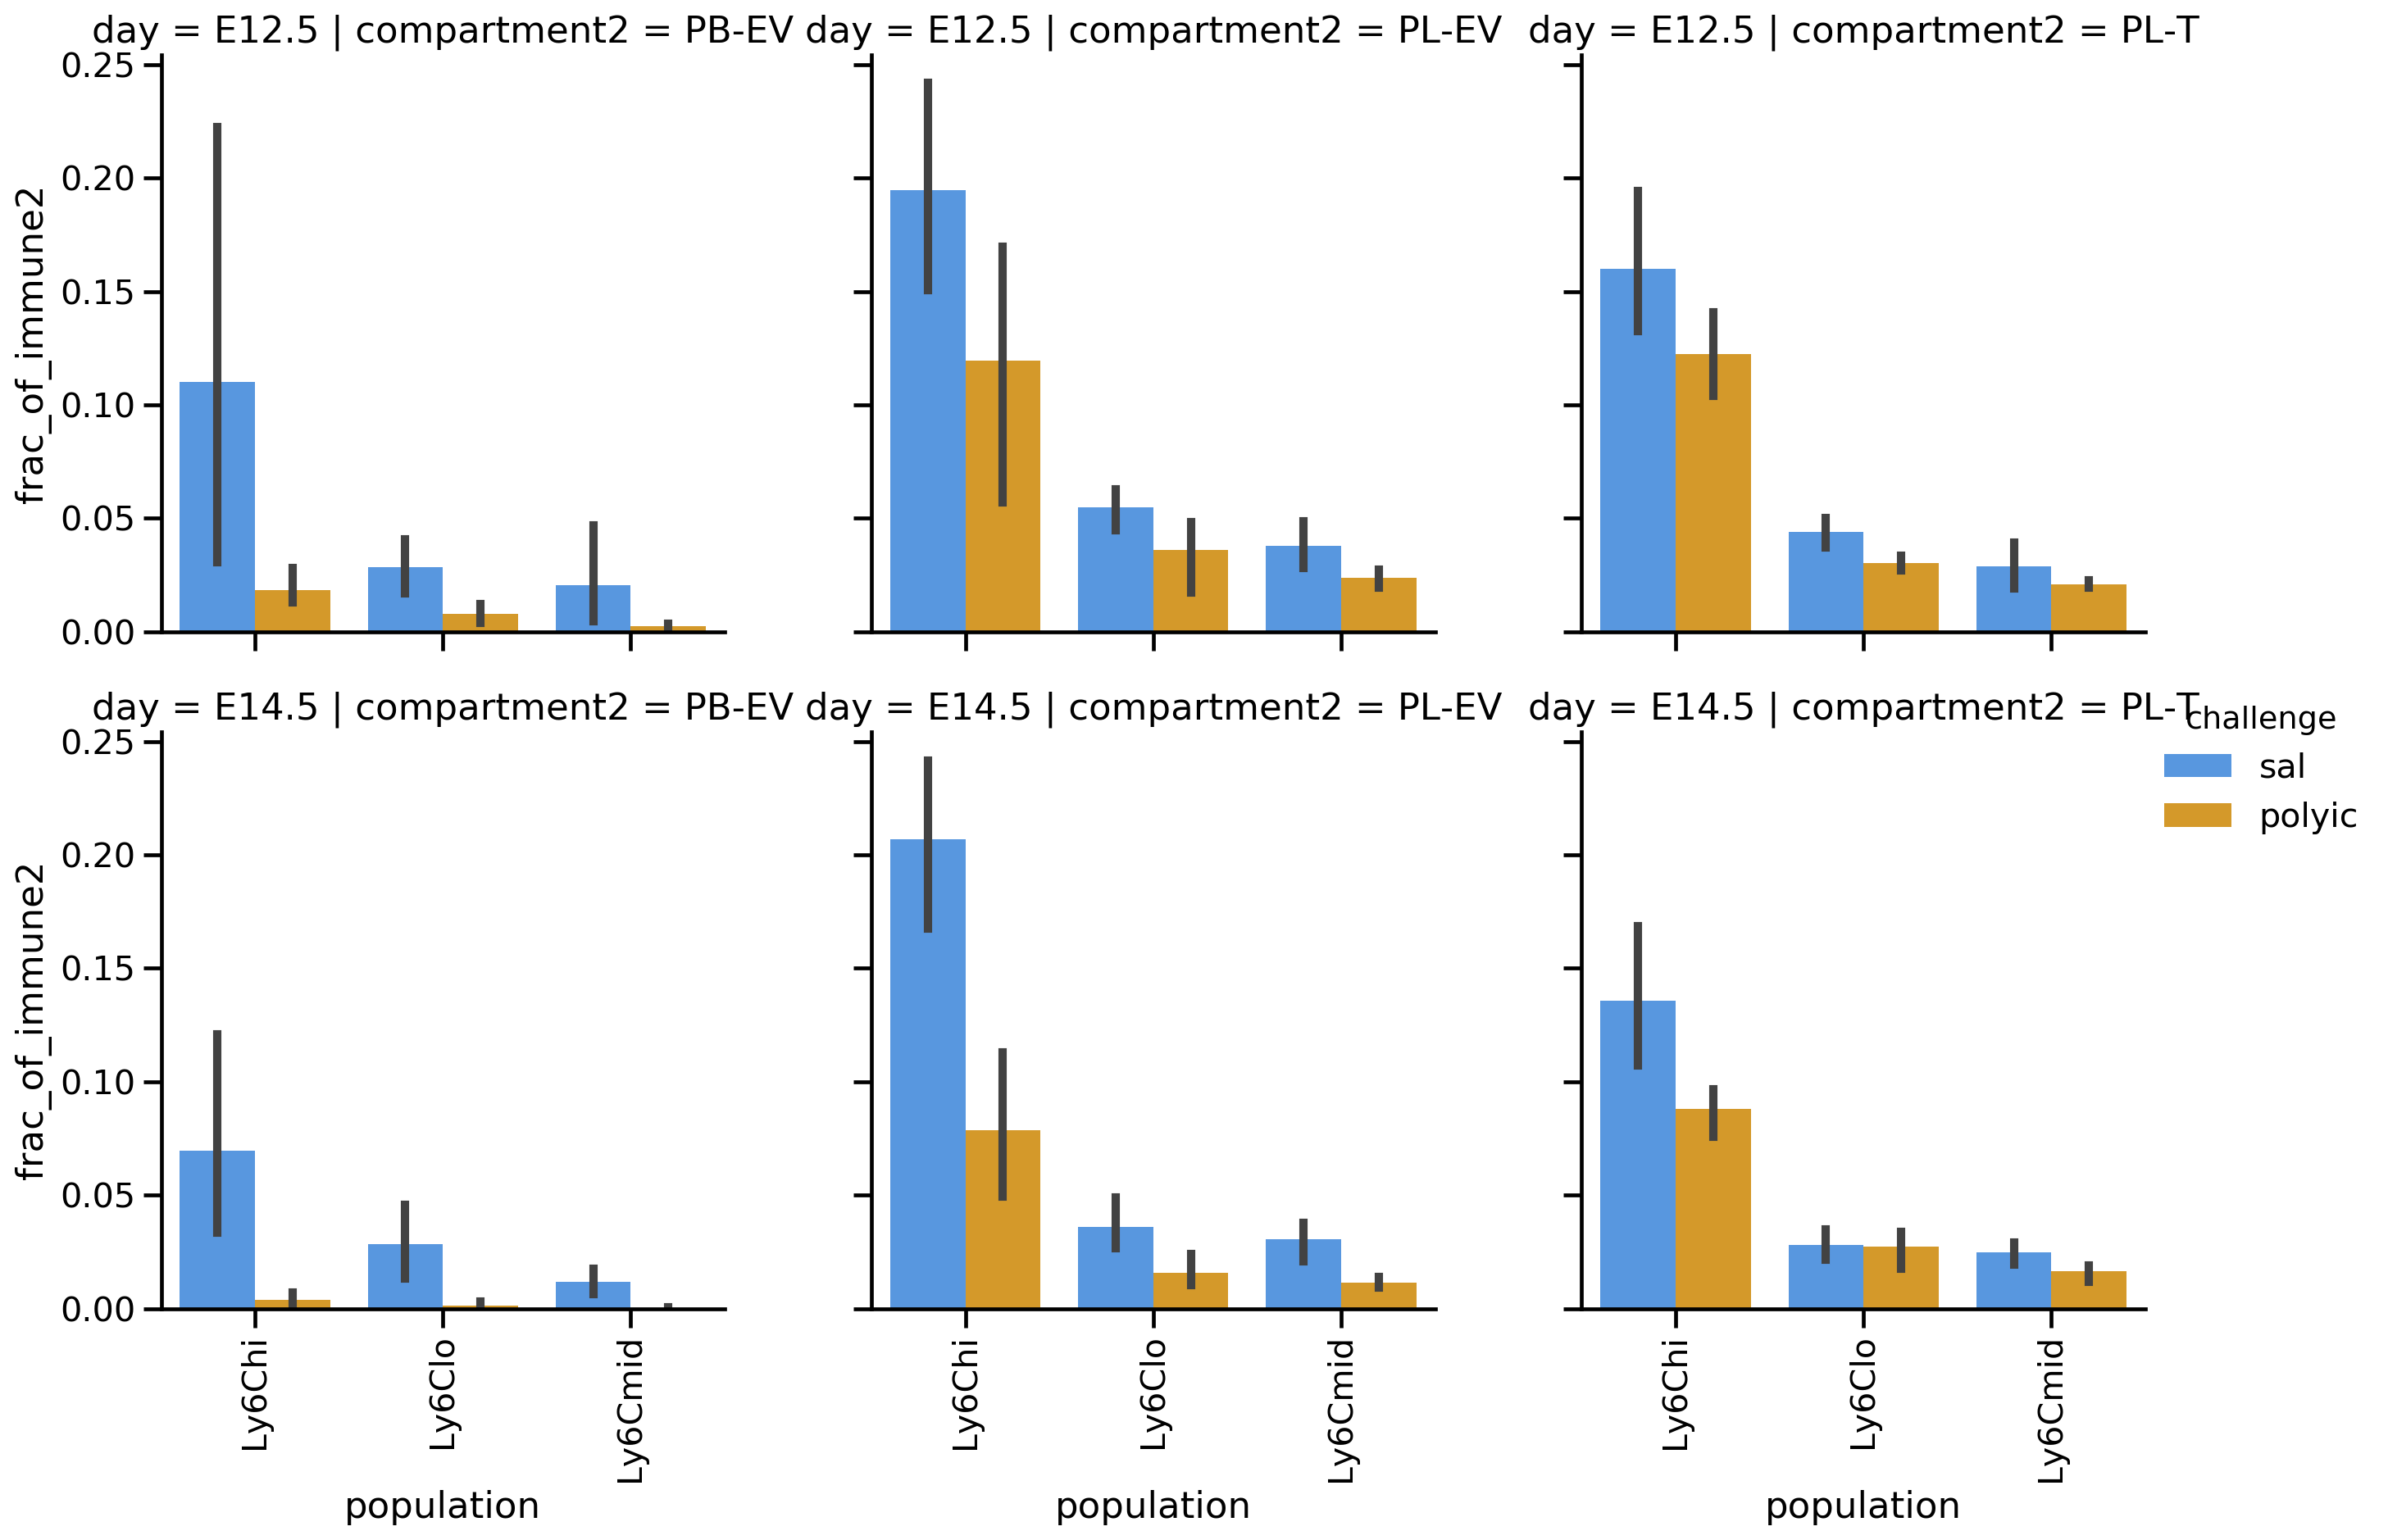

In [51]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = mono_class_counts[mono_class_counts['timePI'].isin(['2hr']) & mono_class_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_immune2',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], row_order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


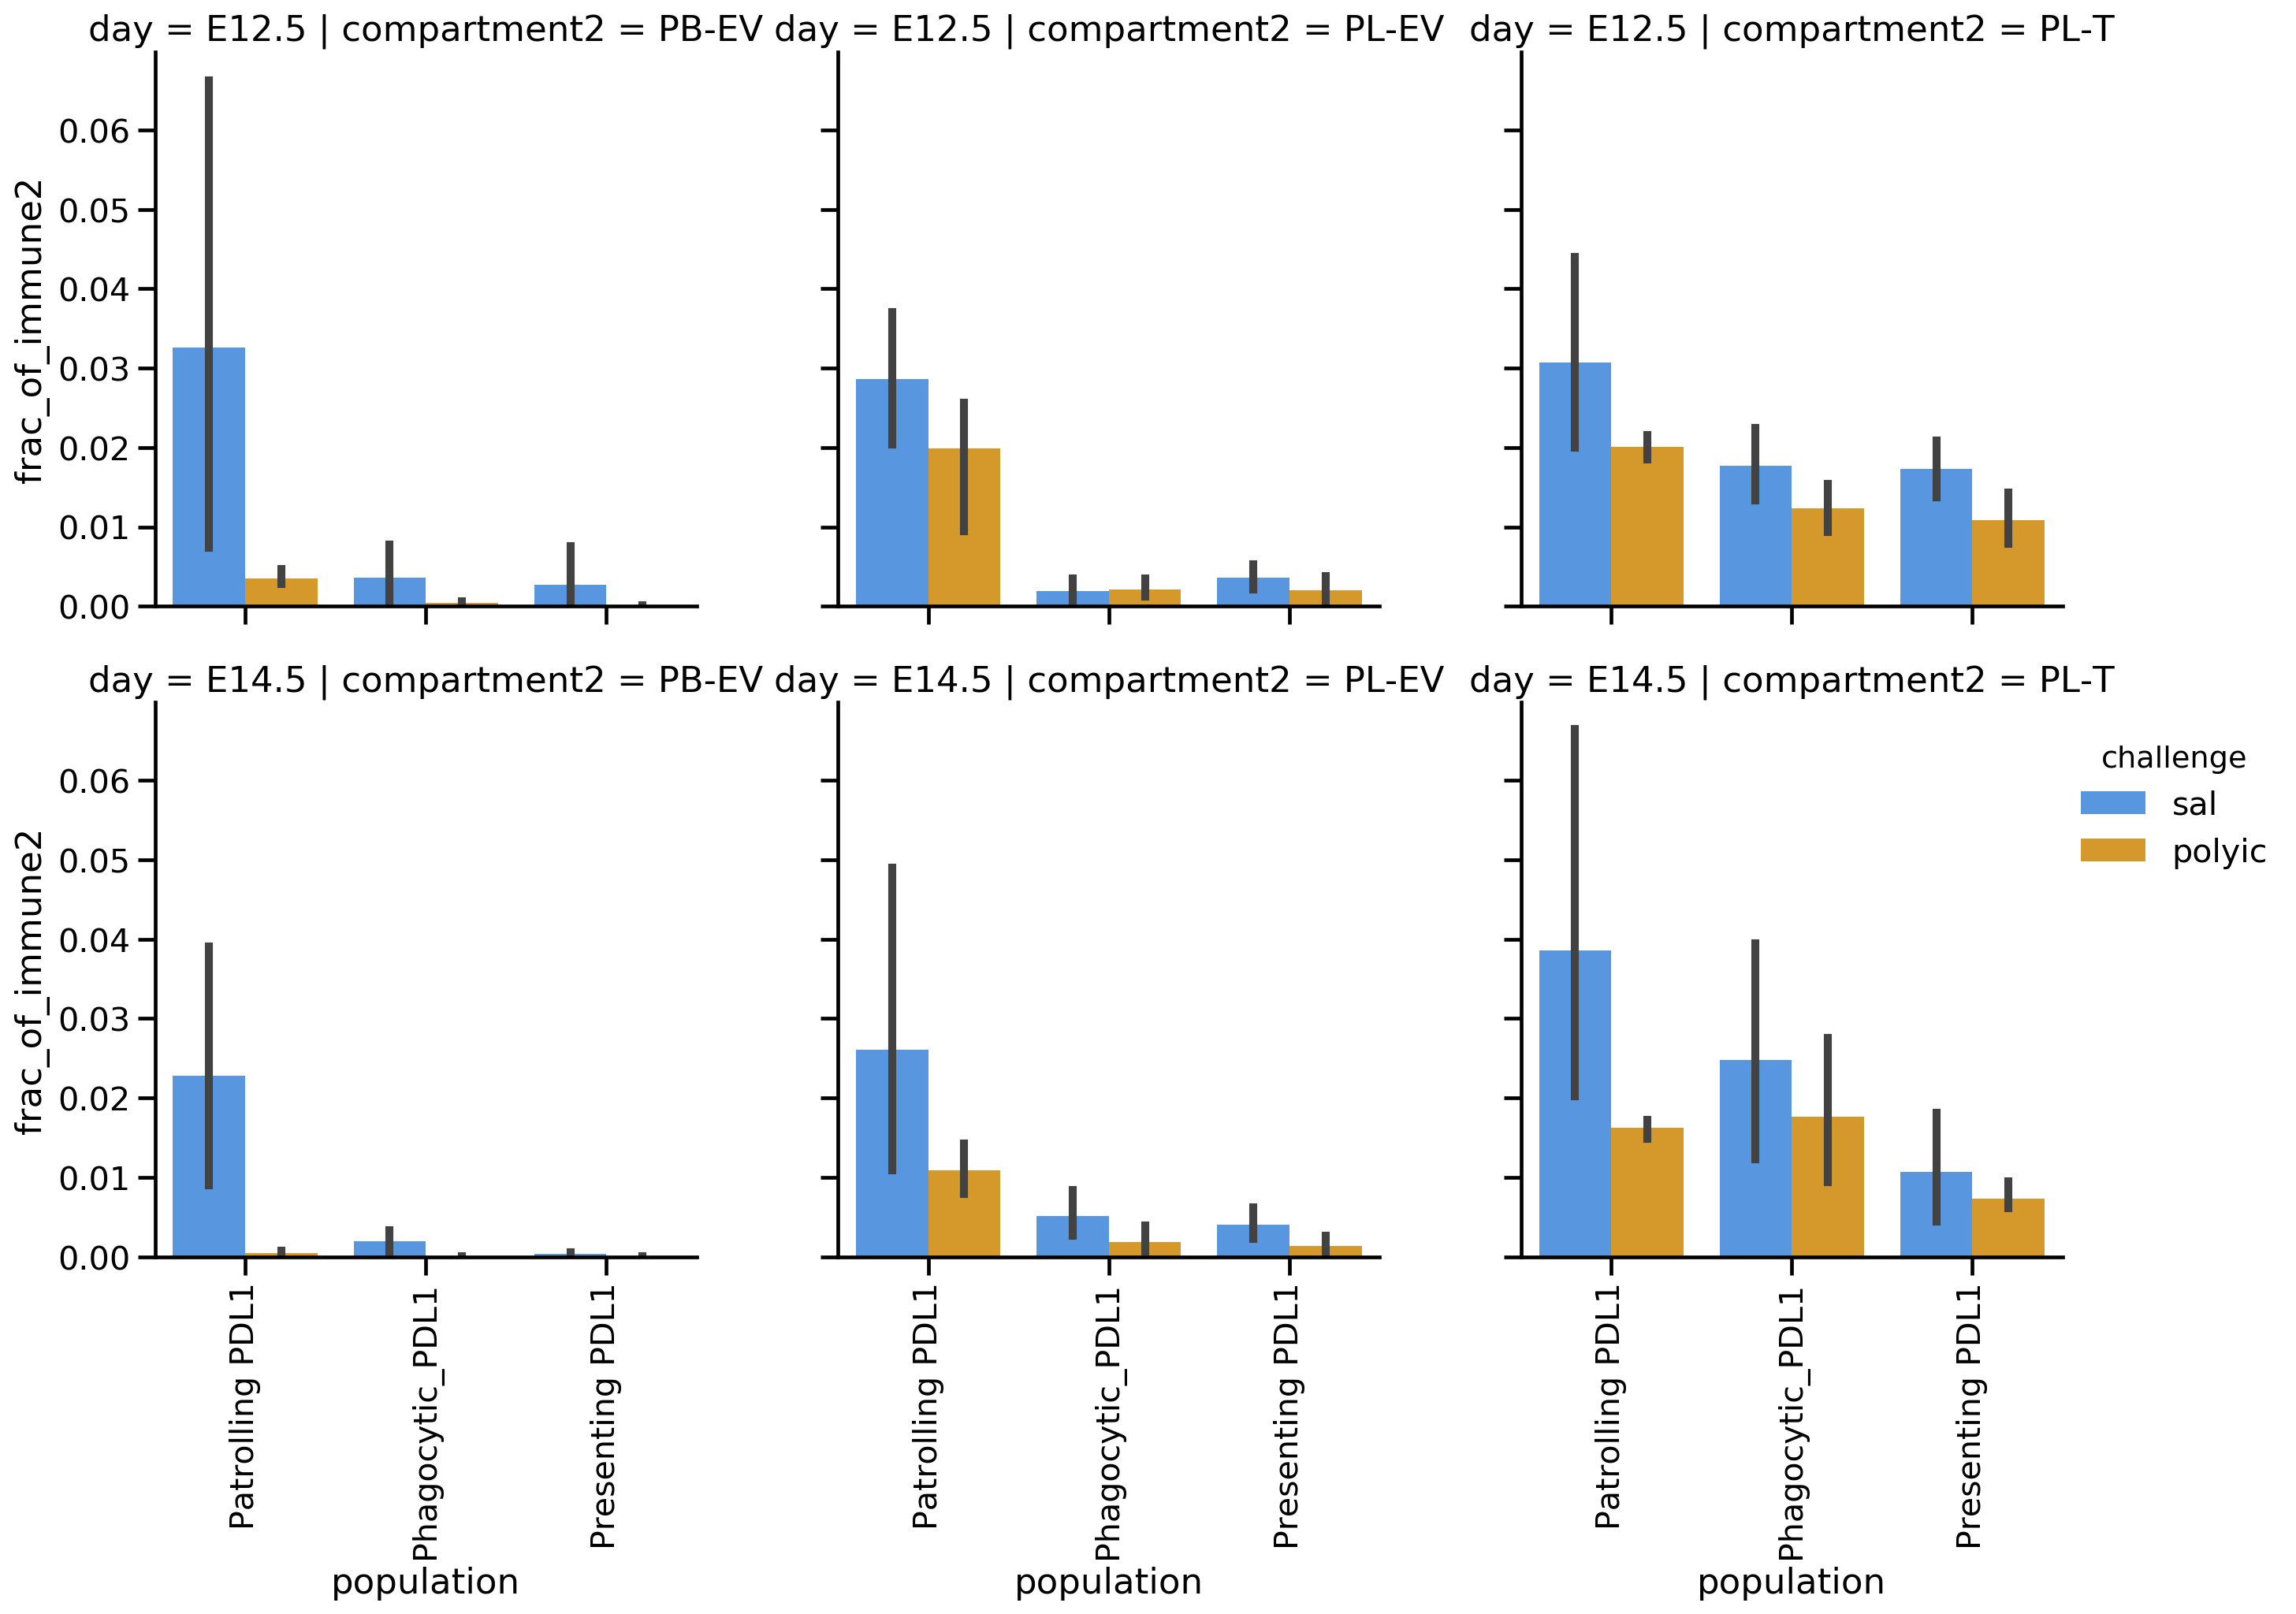

In [52]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = PDL1_class_counts[PDL1_class_counts['timePI'].isin(['2hr']) & PDL1_class_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_immune2',
                hue='challenge', hue_order = ['sal', 'polyic'],row_order = ['E12.5', 'E14.5'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


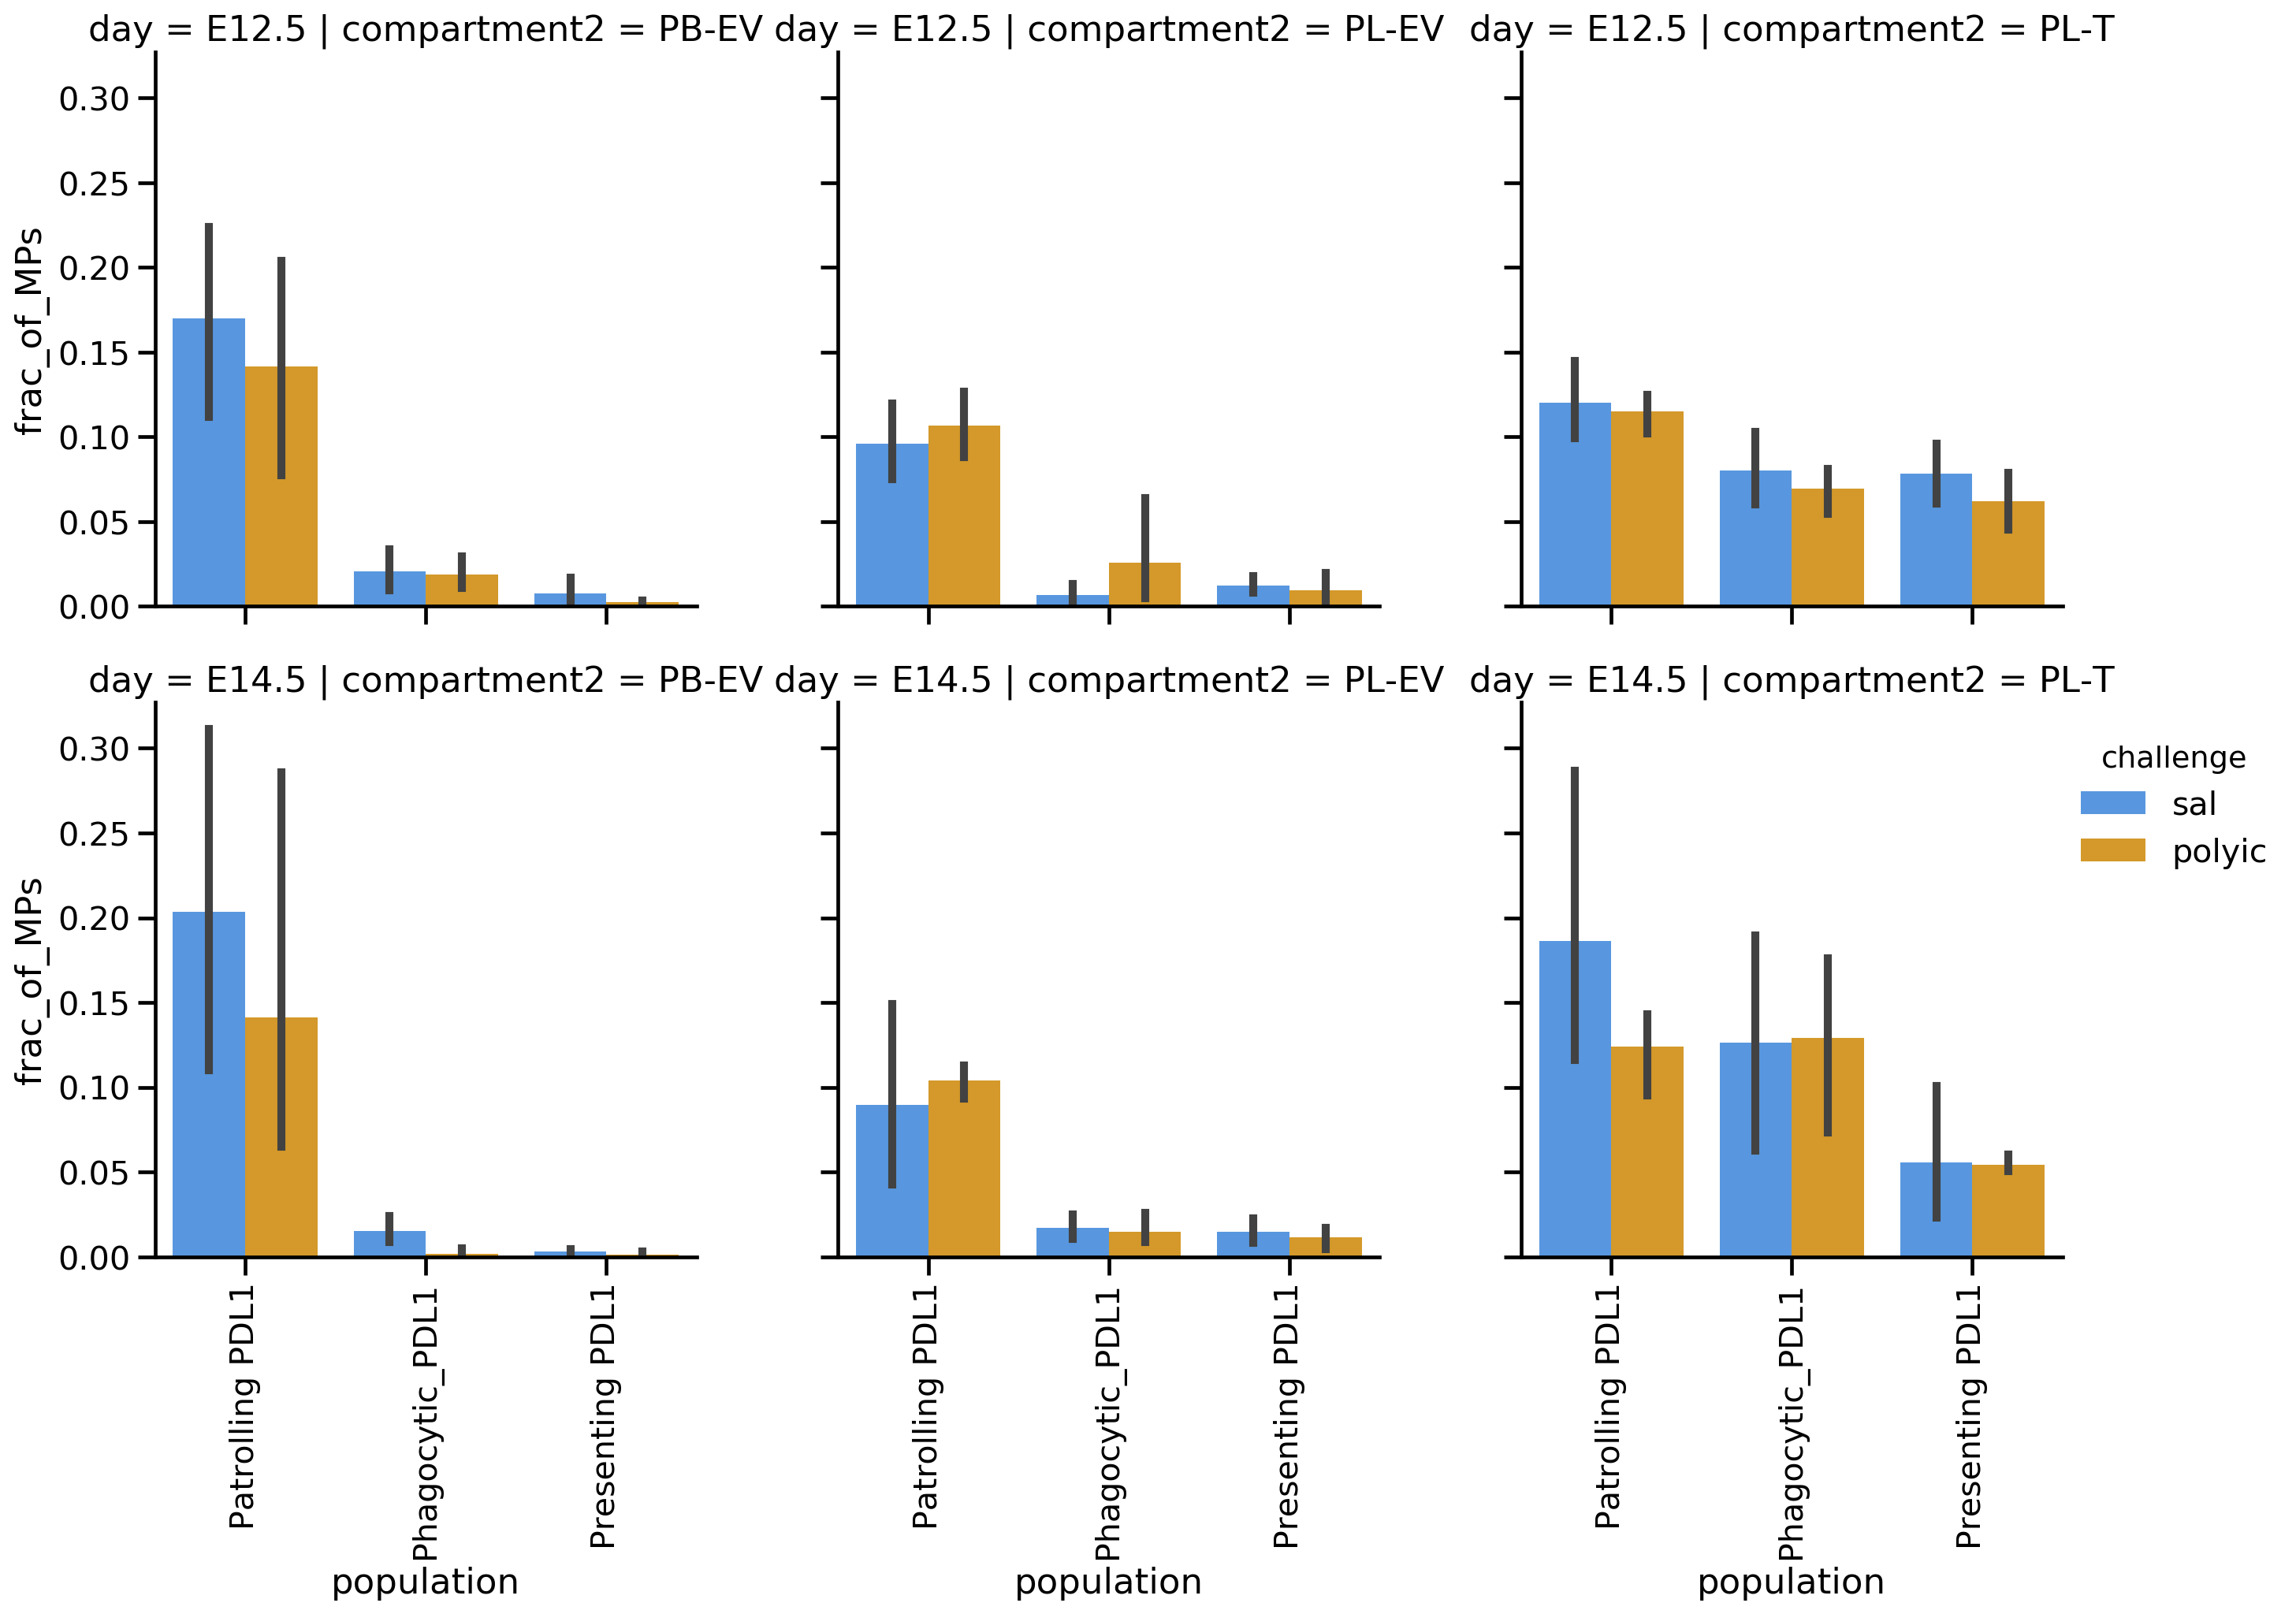

In [53]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = PDL1_class_counts[PDL1_class_counts['timePI'].isin(['2hr']) & PDL1_class_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_MPs',
                hue='challenge', hue_order = ['sal', 'polyic'],row_order = ['E12.5', 'E14.5'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [55]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
MPcountsnew_path = os.path.join(subsample_path, '20201217_MPclasses_cell_counts_CellEngine.csv')
mono_class_counts.to_csv(MPcountsnew_path, index = False)
PDL1countsnew_path = os.path.join(subsample_path, '20201217_MPclasses_cell_counts_CellEngine.csv')
PDL1_class_counts.to_csv(PDL1countsnew_path, index = False)

In [54]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
counts_path = os.path.join(subsample_path, 'pdl1pos_MPs_CellEngine.csv')
pdl1counts_df = pd.read_csv(counts_path)
pdl1counts_df.loc[:, ['cage', 'id','surgery_date']] = pdl1counts_df.loc[:, ['cage', 'id','surgery_date']].astype(str)

In [56]:
pdl1counts_df.head(5)

,fcsFileId,populationId,filename,population,uniquePopulationName,parentPopulation,parentPopulationId,channel,reagent,cage,challenge,day,id,organ,origin,surgery_date,timePI,eventCount
0,5fd149e6c356b30378ddbd57,5fdbb0ac0f683b2989a79b8e,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,Mo_PDL1pos,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,CD68_pos,5fdbb0ac0f683b2989a79fe6,NaN,NaN,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0
1,5fd149e6c356b30378ddbd57,5fdbb0c40f683b2989a7a5e1,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,Mo_PDL1pos,TIS > Not_B_cells > Not_CD3 > CD68posOnly > No...,CD68_pos,5fdbb0c40f683b2989a7a881,NaN,NaN,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0
2,5fd14a1842055c036fc1fda0,5fdbb0ac0f683b2989a79b8e,_82318 Cage 0428 14 E12.5 PL_M p1 2hr sal_Not ...,Mo_PDL1pos,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,CD68_pos,5fdbb0ac0f683b2989a79fe6,NaN,NaN,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,329
3,5fd14a1842055c036fc1fda0,5fdbb0c40f683b2989a7a5e1,_82318 Cage 0428 14 E12.5 PL_M p1 2hr sal_Not ...,Mo_PDL1pos,TIS > Not_B_cells > Not_CD3 > CD68posOnly > No...,CD68_pos,5fdbb0c40f683b2989a7a881,NaN,NaN,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,533
4,5fd14a1b3b9464037692fb5e,5fdbb0ac0f683b2989a79b8e,_82318 Cage 0428 14 E12.5 PL_F p1 2hr sal_Not ...,Mo_PDL1pos,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,CD68_pos,5fdbb0ac0f683b2989a79fe6,NaN,NaN,428,sal,E12.5,14,PL_F,maternal,_82318,2hr,434


In [57]:
red_counts_df = pdl1counts_df.loc[:, ['filename','population', 'uniquePopulationName', 'cage', 'challenge', 'day', 'id', 'organ',
       'origin', 'surgery_date', 'timePI','eventCount']].set_index('filename')
locations = red_counts_df['uniquePopulationName'].str.split('>',n = 1, expand = True)
new_counts = pd.concat([red_counts_df, locations[0]], axis=1)
new_counts.drop(columns = ['uniquePopulationName'], inplace = True)
new_counts.rename(columns = {0: 'location'}, inplace = True)

In [58]:
new_counts['year'] = new_counts['surgery_date'].str.strip().str[-1]
year_dict = {'6': '2016','7': '2017', '8': '2018', '9': '2019'}
new_counts['batch_run'] = new_counts['year'].map(year_dict)
new_counts.drop(columns = 'year', inplace = True)

In [59]:
new_counts['organ'].unique()

array(['PB', 'PL_M', 'PL_F', 'PL', 'PL_U', 'decidua'], dtype=object)

In [60]:
PB_mask = (new_counts['batch_run'].isin(['2016', '2017']) & (new_counts['organ'] == 'PB'))
new_counts['location'][PB_mask] = 'EV'
PL_mask = (new_counts['batch_run'].isin(['2016', '2017']) & new_counts['organ'].isin(['PL_M', 'PL_F', 'PL', 'PL_U', 'decidua']))
new_counts['location'][PL_mask] = 'whole'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [61]:
new_counts['compartment'] = new_counts['organ'].str.cat(new_counts['location'], sep= '-')

In [62]:
comp_dict = {'PB-EV': 'PB-EV', 
'PL_M-EV ': 'PL-EV', 
'PL_M-TIS ': 'PL-T', 
'PL_F-EV ': 'PL-EV', 
'PL_F-TIS ': 'PL-T',
'PL-EV ': 'PL-EV', 
'PL-TIS ': 'PL-T', 
'PL_M-whole': 'PL-whole', 
'PL_F-whole': 'PL-whole', 
'PB-EV ': 'PB-EV',
'PB-TIS ': 'PB-T',
'decidua-EV ':'decidua-EV',
'decidua-TIS ': 'decidua-T',
'PL_U-EV ': 'PL-EV',
'PL_U-TIS ': 'PL-T'}
new_counts['compartment2']= new_counts['compartment'].map(comp_dict)

In [63]:
new_counts['compartment2'].unique() 

array(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole',
       'PB-T'], dtype=object)

In [64]:
new_counts_clean = new_counts[new_counts['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole'])]
class_cell_counts = new_counts_clean
class_cell_counts['sample'] = class_cell_counts['cage'].astype(str).str.cat(class_cell_counts['id'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['day'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['challenge'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['timePI'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['compartment2'], sep= '_')
class_cell_counts['sample_cell'] = class_cell_counts['sample'].str.cat(class_cell_counts['population'], sep= '_')
cell_counts = pd.DataFrame(data = class_cell_counts.groupby(['population', 'cage', 'challenge', 'day', 'id', 'origin','timePI', 'batch_run', 'compartment2', 'sample',
        'sample_cell']).sum())
cell_counts.reset_index(inplace = True)
cell_counts.rename(columns = {'eventCount': 'counts'}, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A 

In [65]:
main_counts

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts
0,CD68_pos,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_CD68_pos,5808
1,CD68_pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_CD68_pos,631
2,CD68_pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_CD68_pos,970
3,CD68_pos,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_CD68_pos,4348
4,CD68_pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_CD68_pos,939
5,CD68_pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-T,1136_4_E14.5_polyic_24hr_PL-T,1136_4_E14.5_polyic_24hr_PL-T_CD68_pos,740
6,CD68_pos,1136,sal,E14.5,1,maternal,2hr,2018,PB-EV,1136_1_E14.5_sal_2hr_PB-EV,1136_1_E14.5_sal_2hr_PB-EV_CD68_pos,846
7,CD68_pos,1136,sal,E14.5,1,maternal,2hr,2018,PL-EV,1136_1_E14.5_sal_2hr_PL-EV,1136_1_E14.5_sal_2hr_PL-EV_CD68_pos,1837
8,CD68_pos,1136,sal,E14.5,1,maternal,2hr,2018,PL-T,1136_1_E14.5_sal_2hr_PL-T,1136_1_E14.5_sal_2hr_PL-T_CD68_pos,1267
9,CD68_pos,1137,sal,E14.5,8,maternal,24hr,2018,PB-EV,1137_8_E14.5_sal_24hr_PB-EV,1137_8_E14.5_sal_24hr_PB-EV_CD68_pos,4922


In [66]:
cell_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts
0,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_Mo_PDL1pos,332
1,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_Mo_PDL1pos,74
2,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_Mo_PDL1pos,410
3,Mo_PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_Mo_PDL1pos,534
4,Mo_PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_Mo_PDL1pos,438


In [70]:
PDL1_class_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_MPs,full_sample_total2,frac_of_immune2
440,Patrolling PDL1,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_Patrolling PDL1,261,5808,0.044938,173512.0,0.001504
441,Patrolling PDL1,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_Patrolling PDL1,61,631,0.096672,2918.0,0.020905
442,Patrolling PDL1,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_Patrolling PDL1,90,970,0.092784,2750.0,0.032727
443,Patrolling PDL1,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_Patrolling PDL1,432,4348,0.099356,55417.0,0.007795
444,Patrolling PDL1,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_Patrolling PDL1,285,939,0.303514,2762.0,0.103186


In [71]:
sample_total = PDL1_class_counts[['sample', 'sample_total']].set_index('sample')
sample_dict = sample_total.to_dict()

In [73]:
cell_counts.loc[:,'sample_total'] =cell_counts['sample'].map(sample_dict['sample_total'])
cell_counts['frac_of_MPs'] = cell_counts['counts']/cell_counts['sample_total']
samp_total_df = full_cell_counts.loc[:, ['sample', 'sample_total2']]
samp_total_df.set_index('sample', inplace = True)
total_counts_dict = samp_total_df.to_dict()
cell_counts.loc[:,'full_sample_total2'] = cell_counts.loc[:,'sample'].map(total_counts_dict['sample_total2'])
cell_counts['frac_of_immune2'] = cell_counts['counts']/cell_counts['full_sample_total2']

subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path_pdl1 = os.path.join(subsample_path, '20201217_MPs_PDL1percentPos_CellEngine.csv')
cell_counts.to_csv(countsnew_path_pdl1, index = False)

In [74]:
cell_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_MPs,full_sample_total2,frac_of_immune2
0,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_Mo_PDL1pos,332,5808,0.057163,173512.0,0.001913
1,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_Mo_PDL1pos,74,631,0.117274,2918.0,0.025360
2,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_Mo_PDL1pos,410,970,0.422680,2750.0,0.149091
3,Mo_PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_Mo_PDL1pos,534,4348,0.122815,55417.0,0.009636
4,Mo_PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_Mo_PDL1pos,438,939,0.466454,2762.0,0.158581


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


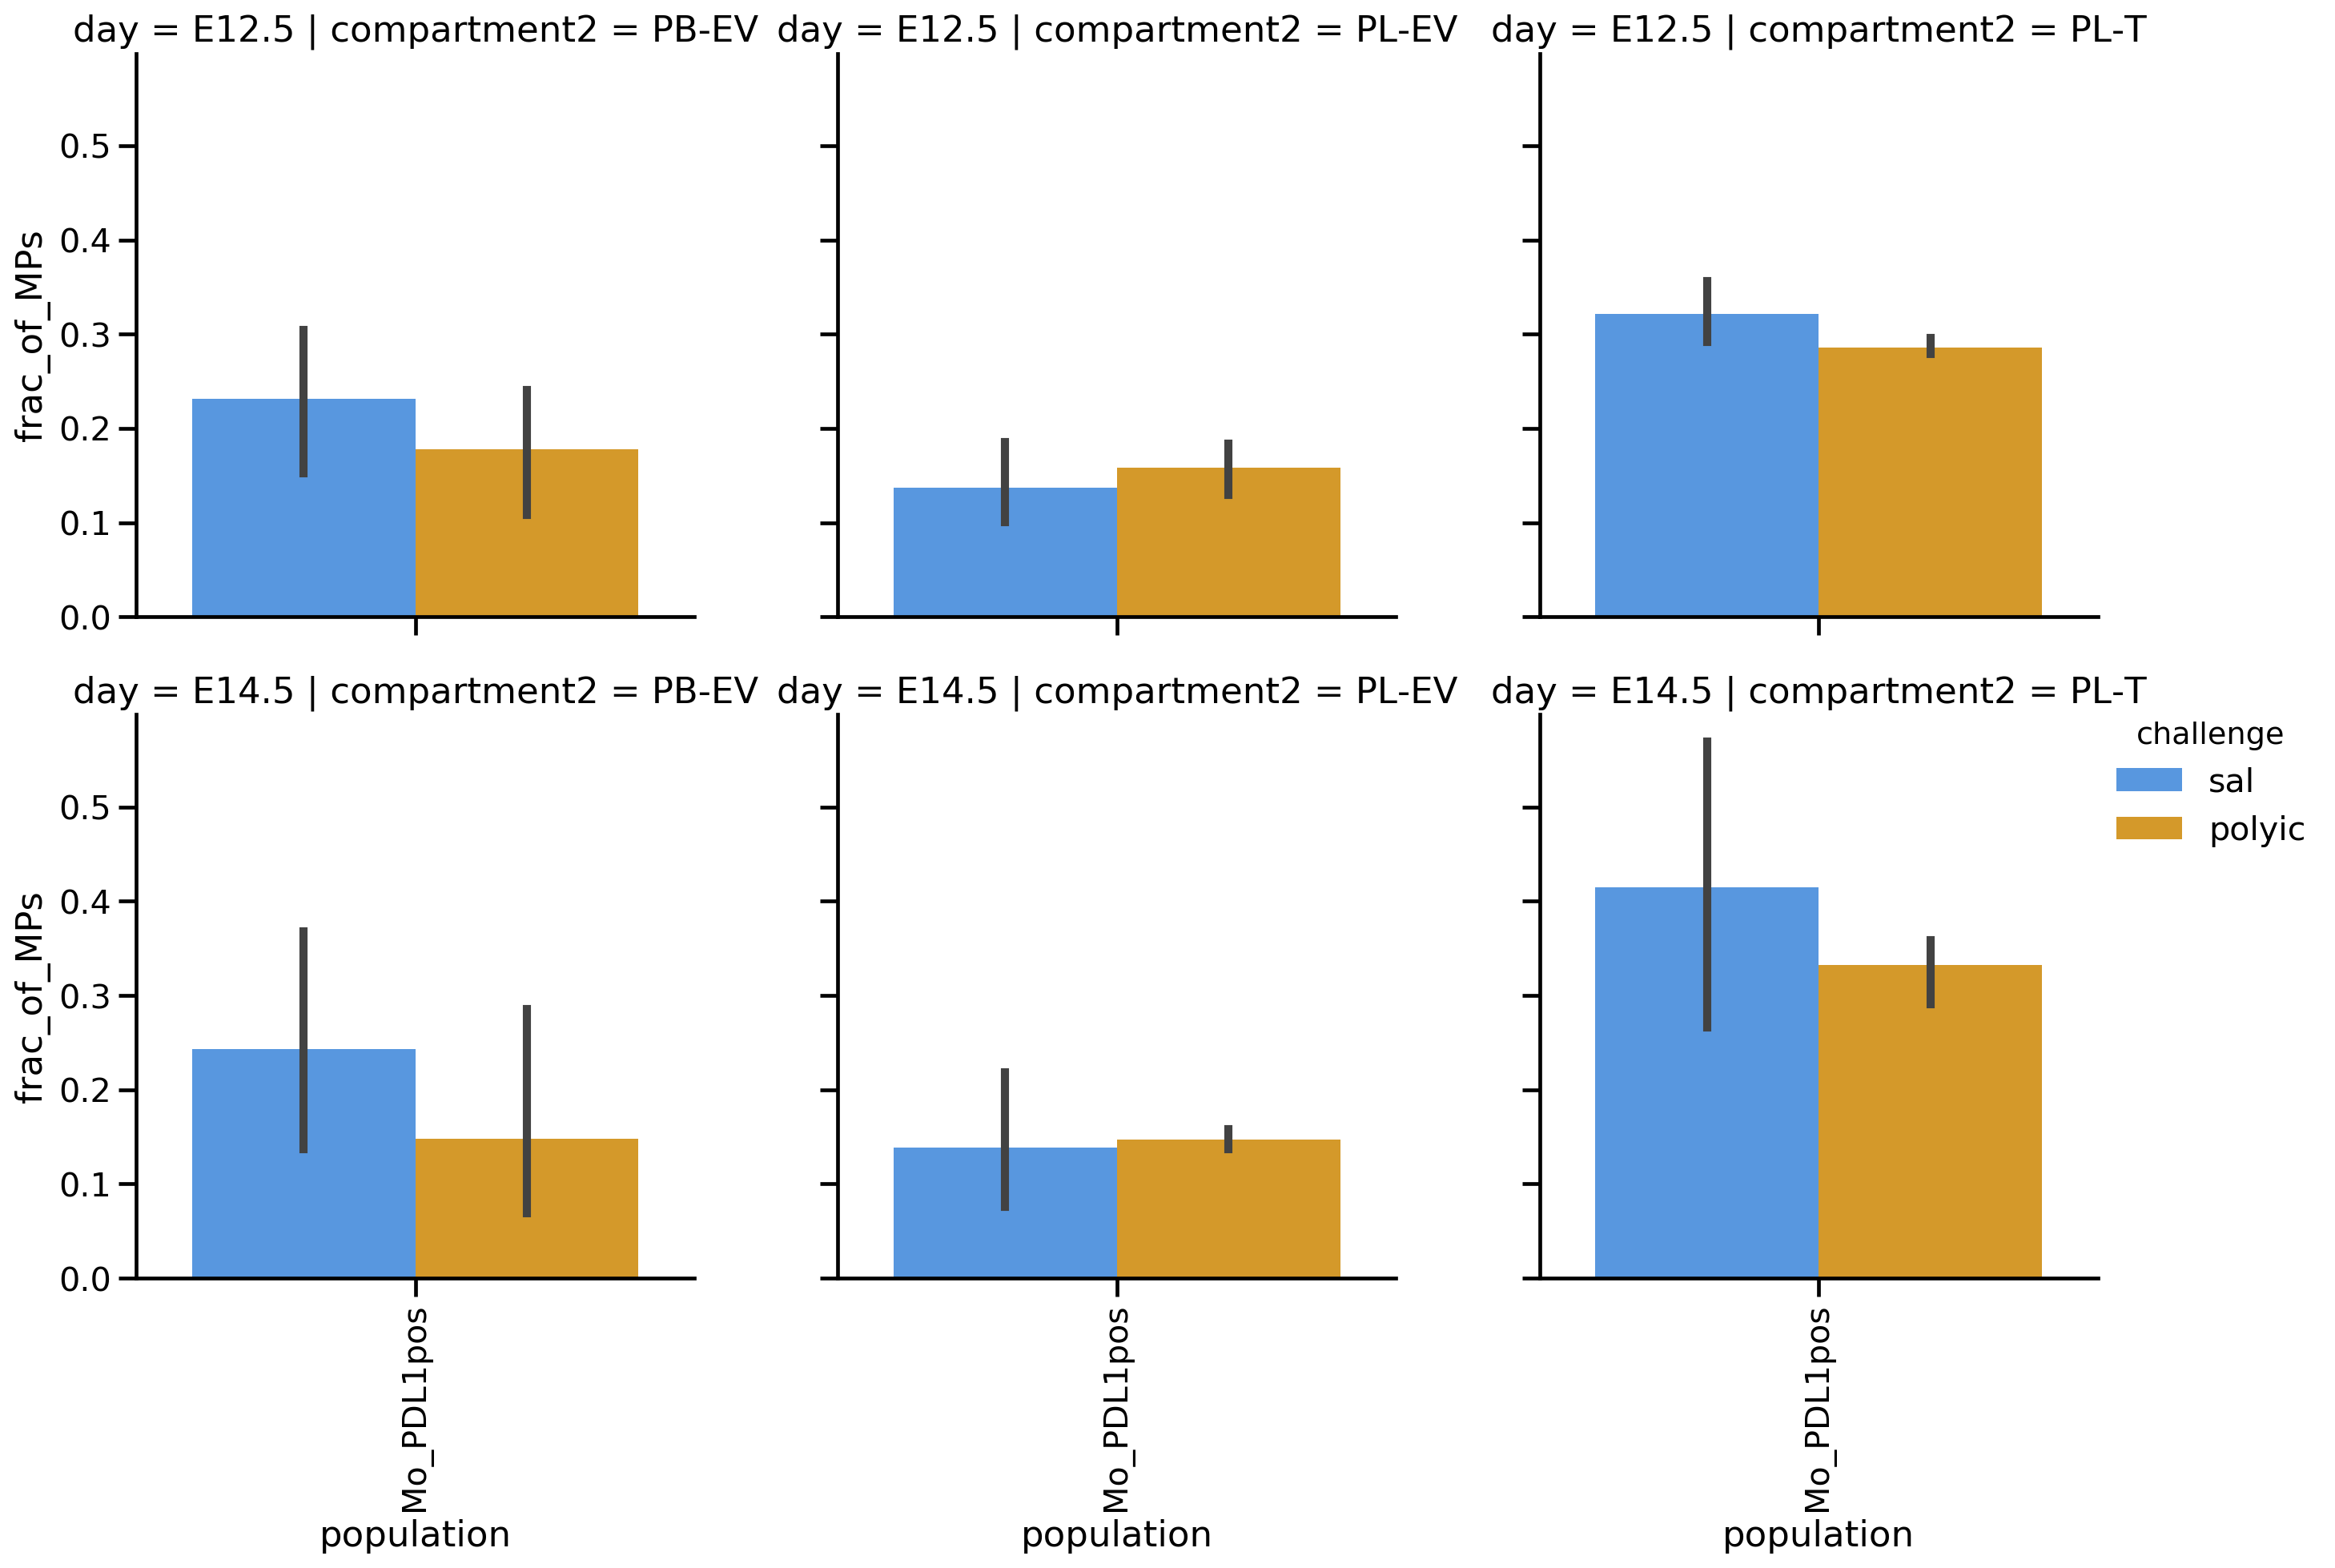

In [75]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = cell_counts[cell_counts['timePI'].isin(['2hr']) & cell_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_MPs',
                hue='challenge', hue_order = ['sal', 'polyic'],row_order = ['E12.5', 'E14.5'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


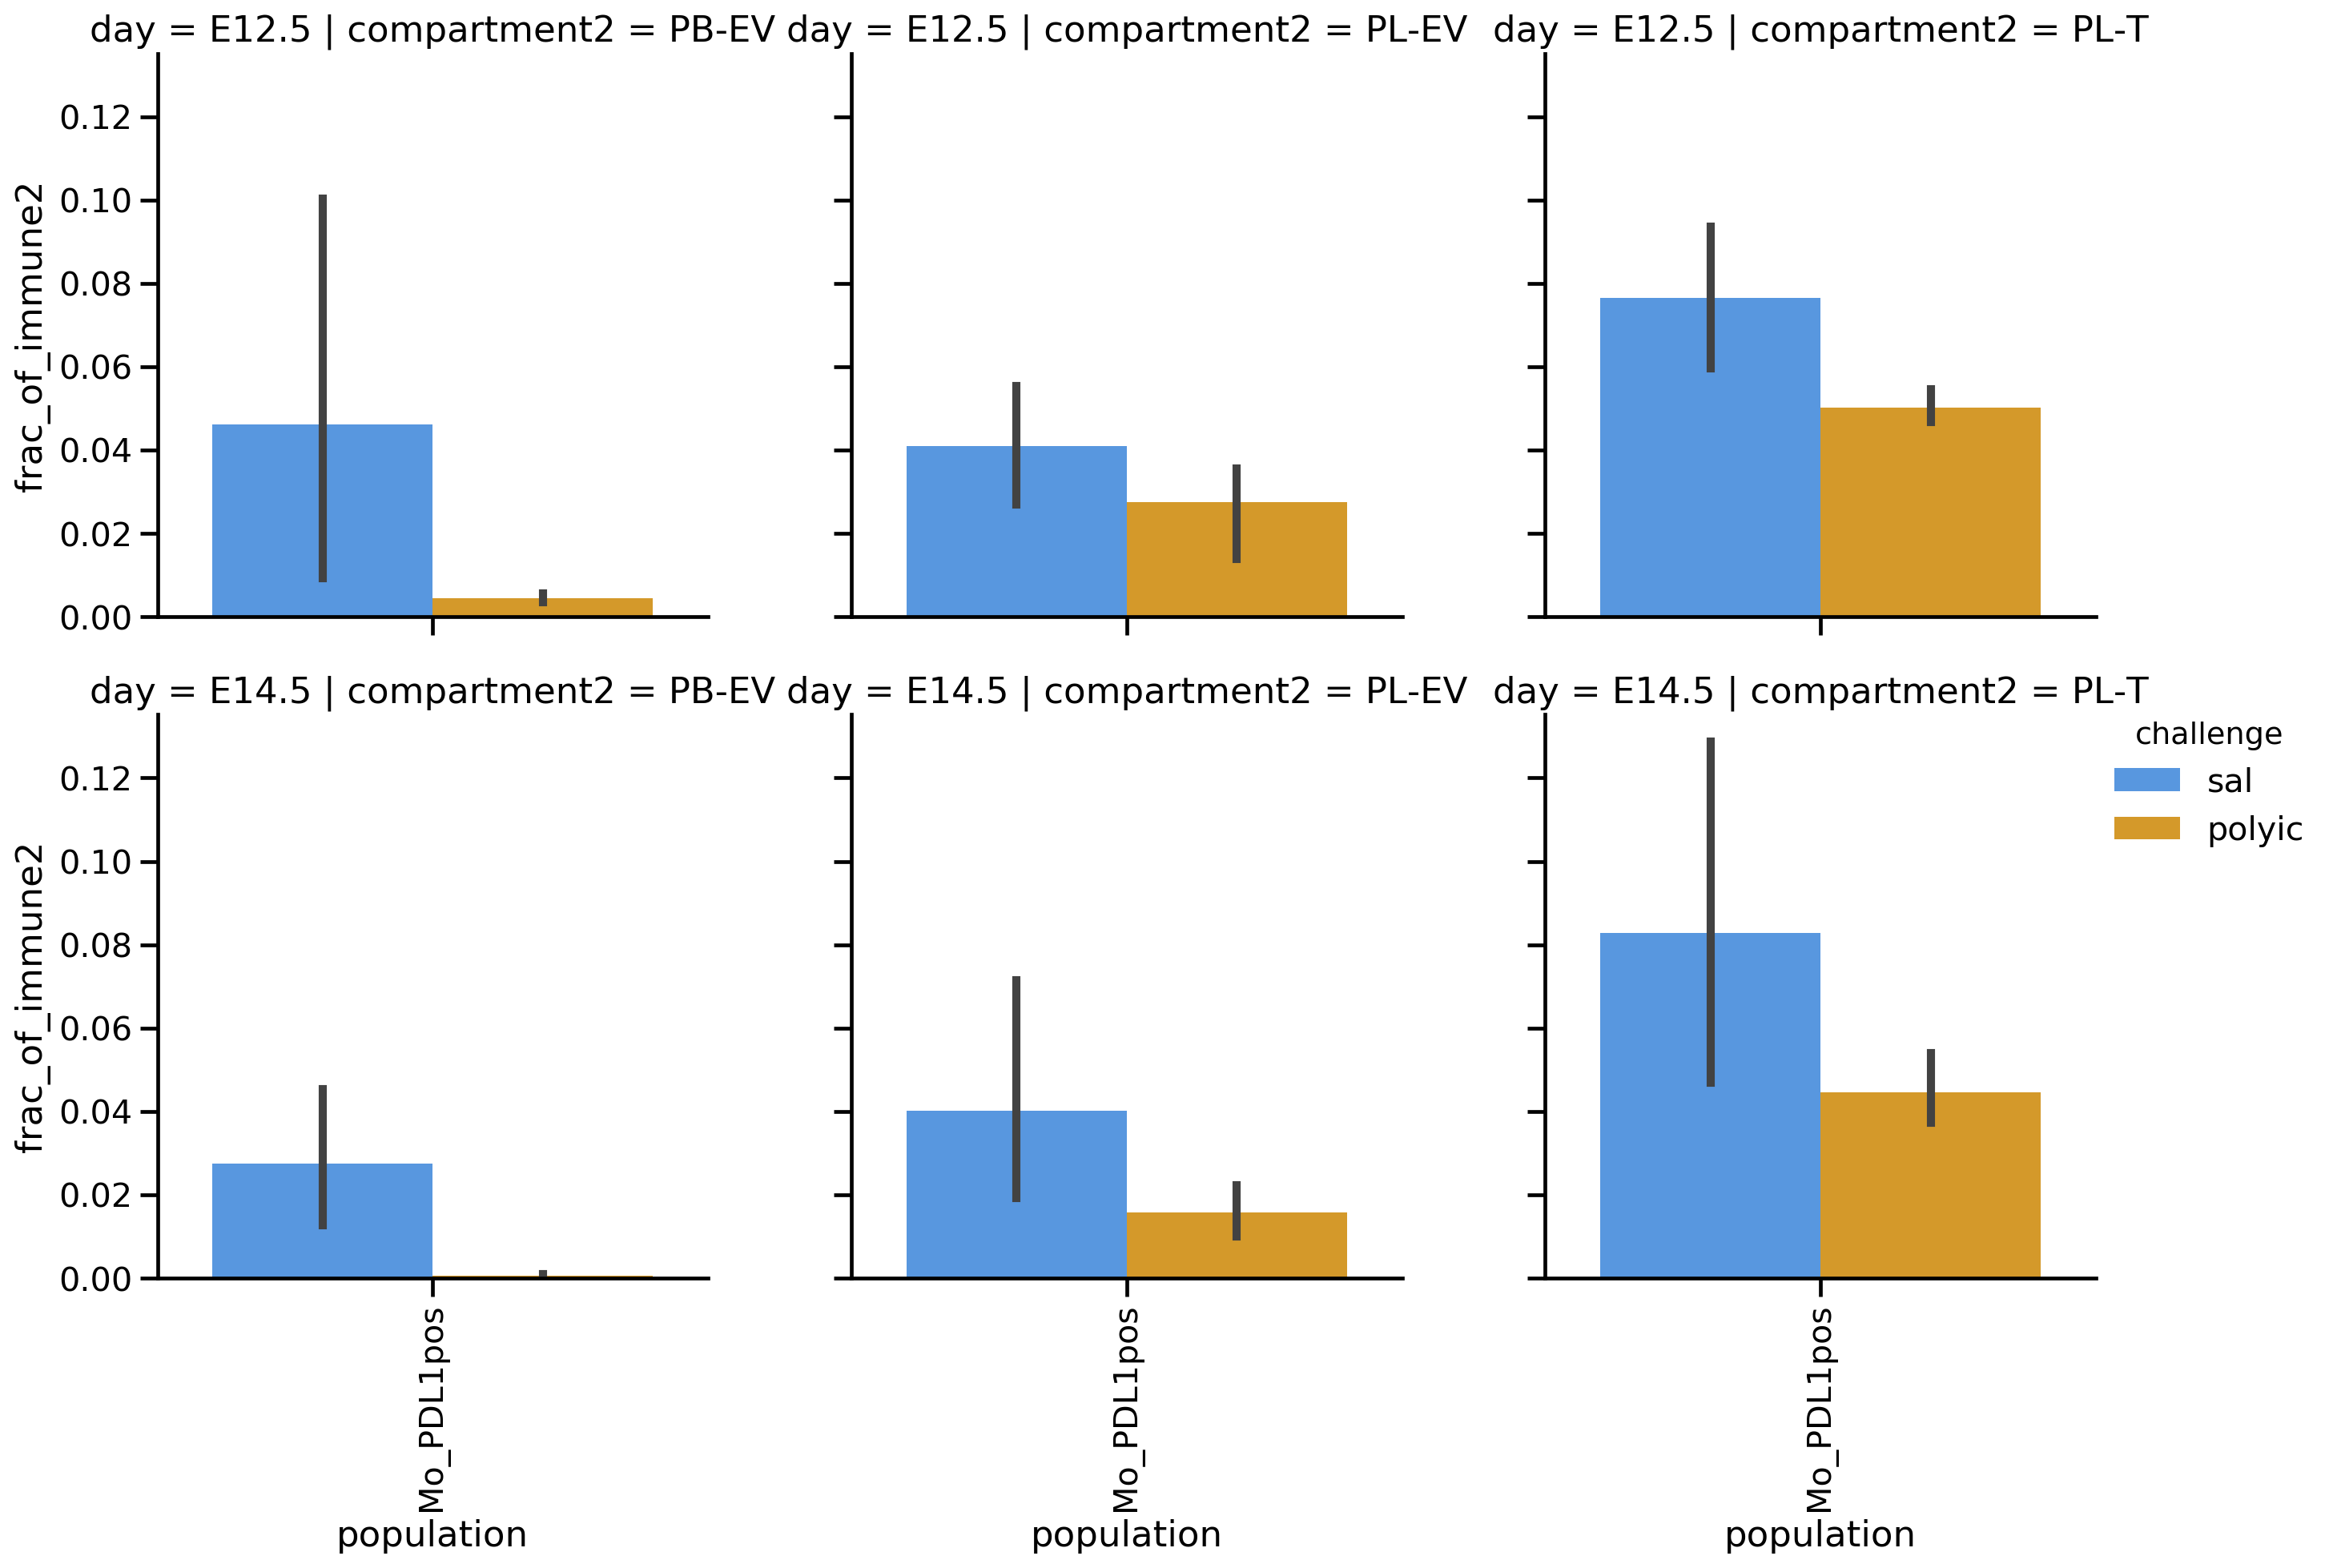

In [76]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = cell_counts[cell_counts['timePI'].isin(['2hr']) & cell_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_immune2',
                hue='challenge', hue_order = ['sal', 'polyic'],row_order = ['E12.5', 'E14.5'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [77]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
counts_path = os.path.join(subsample_path, '20201218_Neu_Mo_counts.csv')
counts_df = pd.read_csv(counts_path)
counts_df.loc[:, ['cage', 'id','surgery_date']] = counts_df.loc[:, ['cage', 'id','surgery_date']].astype(str)

In [79]:
red_counts_df = counts_df.loc[:, ['filename','population', 'uniquePopulationName', 'cage', 'challenge', 'day', 'id', 'organ',
       'origin', 'surgery_date', 'timePI','eventCount']].set_index('filename')
locations = red_counts_df['uniquePopulationName'].str.split('>',n = 1, expand = True)
new_counts = pd.concat([red_counts_df, locations[0]], axis=1)
new_counts.drop(columns = ['uniquePopulationName'], inplace = True)
new_counts.rename(columns = {0: 'location'}, inplace = True)
new_counts['year'] = new_counts['surgery_date'].str.strip().str[-1]
year_dict = {'6': '2016','7': '2017', '8': '2018', '9': '2019'}
new_counts['batch_run'] = new_counts['year'].map(year_dict)
new_counts.drop(columns = 'year', inplace = True)
PB_mask = (new_counts['batch_run'].isin(['2016', '2017']) & (new_counts['organ'] == 'PB'))
new_counts['location'][PB_mask] = 'EV'
PL_mask = (new_counts['batch_run'].isin(['2016', '2017']) & new_counts['organ'].isin(['PL_M', 'PL_F', 'PL', 'PL_U', 'decidua']))
new_counts['location'][PL_mask] = 'whole'
new_counts['compartment'] = new_counts['organ'].str.cat(new_counts['location'], sep= '-')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
new_counts['compartment'].unique()

array(['PB-EV', 'PL_M-EV ', 'PL_M-TIS ', 'PL_F-EV ', 'PL_F-TIS ',
       'PL-EV ', 'PL-TIS ', 'PL_U-EV ', 'PL_U-TIS ', 'decidua-EV ',
       'decidua-TIS ', 'PL_M-whole', 'PL_F-whole', 'PB-EV ', 'PB-TIS '],
      dtype=object)

In [81]:
comp_dict = {'PB-EV': 'PB-EV', 
'PL_M-EV ': 'PL-EV', 
'PL_M-TIS ': 'PL-T', 
'PL_F-EV ': 'PL-EV', 
'PL_F-TIS ': 'PL-T',
'PL-EV ': 'PL-EV', 
'PL-TIS ': 'PL-T', 
'PL_M-whole': 'PL-whole', 
'PL_F-whole': 'PL-whole', 
'PB-EV ': 'PB-EV',
'PB-TIS ': 'PB-T',
'decidua-EV ':'decidua-EV',
'decidua-TIS ': 'decidua-T',
'PL_U-EV ': 'PL-EV',
'PL_U-TIS ': 'PL-T'}
new_counts['compartment2']= new_counts['compartment'].map(comp_dict)
new_counts_clean = new_counts[new_counts['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole'])]

In [82]:
class_cell_counts = new_counts_clean
class_cell_counts['sample'] = class_cell_counts['cage'].astype(str).str.cat(class_cell_counts['id'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['day'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['challenge'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['timePI'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['compartment2'], sep= '_')
class_cell_counts['sample_cell'] = class_cell_counts['sample'].str.cat(class_cell_counts['population'], sep= '_')
cell_counts = pd.DataFrame(data = class_cell_counts.groupby(['population', 'cage', 'challenge', 'day', 'id', 'origin','timePI', 'batch_run', 'compartment2', 'sample',
        'sample_cell']).sum())
cell_counts.reset_index(inplace = True)
cell_counts.rename(columns = {'eventCount': 'counts'}, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [84]:
cell_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts
0,CD80 neu,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_CD80 neu,2148
1,CD80 neu,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_CD80 neu,13
2,CD80 neu,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_CD80 neu,34
3,CD80 neu,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_CD80 neu,1245
4,CD80 neu,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_CD80 neu,28


In [85]:
cell_counts['population'].unique()

array(['CD80 neu', 'Conventional Neu', 'Ly6Chi_MHCIIpos',
       'Ly6Chi_PDL1pos', 'Ly6Clo_MHCIIpos', 'Ly6Clo_PDL1pos',
       'Ly6Cmid_MHCIIpos', 'Ly6Cmid_PDL1pos', 'Mo_MHCIIpos',
       'Neutrophils', 'PDL1 Neu', 'Presenting Neu', 'Proliferating Neu'],
      dtype=object)

In [87]:
cell_counts[cell_counts['population']== 'Neutrophils']

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts
990,Neutrophils,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_Neutrophils,30291
991,Neutrophils,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_Neutrophils,249
992,Neutrophils,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_Neutrophils,868
993,Neutrophils,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_Neutrophils,17550
994,Neutrophils,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_Neutrophils,432
995,Neutrophils,1136,polyic,E14.5,4,maternal,24hr,2018,PL-T,1136_4_E14.5_polyic_24hr_PL-T,1136_4_E14.5_polyic_24hr_PL-T_Neutrophils,562
996,Neutrophils,1136,sal,E14.5,1,maternal,2hr,2018,PB-EV,1136_1_E14.5_sal_2hr_PB-EV,1136_1_E14.5_sal_2hr_PB-EV_Neutrophils,3926
997,Neutrophils,1136,sal,E14.5,1,maternal,2hr,2018,PL-EV,1136_1_E14.5_sal_2hr_PL-EV,1136_1_E14.5_sal_2hr_PL-EV_Neutrophils,1225
998,Neutrophils,1136,sal,E14.5,1,maternal,2hr,2018,PL-T,1136_1_E14.5_sal_2hr_PL-T,1136_1_E14.5_sal_2hr_PL-T_Neutrophils,903
999,Neutrophils,1137,sal,E14.5,8,maternal,24hr,2018,PB-EV,1137_8_E14.5_sal_24hr_PB-EV,1137_8_E14.5_sal_24hr_PB-EV_Neutrophils,10191


In [88]:
neu_sub_counts = cell_counts[cell_counts['population'].isin(['CD80 neu', 'Conventional Neu', 'PDL1 Neu', 'Presenting Neu', 'Proliferating Neu'])]
neu_total = cell_counts[cell_counts['population']== 'Neutrophils'][['sample', 'counts']].set_index('sample')
neu_dict = neu_total.to_dict()
neu_sub_counts.loc[:,'sample_total'] = neu_sub_counts['sample'].map(neu_dict['counts'])
neu_sub_counts['frac_of_Neutrophils'] = neu_sub_counts['counts']/neu_sub_counts['sample_total']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [89]:
neu_sub_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_Neutrophils
0,CD80 neu,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_CD80 neu,2148,30291,0.070912
1,CD80 neu,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_CD80 neu,13,249,0.052209
2,CD80 neu,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_CD80 neu,34,868,0.039171
3,CD80 neu,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_CD80 neu,1245,17550,0.070940
4,CD80 neu,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_CD80 neu,28,432,0.064815


In [90]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path = os.path.join(subsample_path, '20201216_edited_main_cell_counts_CellEngine.csv')
full_cell_counts = pd.read_csv(countsnew_path)
full_cell_counts.loc[:, ['cage', 'id', 'batch_run']] = full_cell_counts.loc[:, ['cage', 'id', 'batch_run']].astype(str)

In [91]:
full_cell_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_immune,sample_total2,frac_of_immune2
0,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_B cells,48524,99726,0.486573,173512,0.279658
1,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_B cells,733,1652,0.443705,2918,0.251199
2,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_B cells,146,1498,0.097463,2750,0.053091
3,B cells,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_B cells,6961,32159,0.216456,55417,0.125611
4,B cells,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_B cells,98,1565,0.062620,2762,0.035482


In [92]:
sample_total = full_cell_counts[['sample', 'sample_total2']].set_index('sample')
total_counts_dict = sample_total.to_dict()

In [93]:
neu_sub_counts.loc[:,'full_sample_total2'] = neu_sub_counts.loc[:,'sample'].map(total_counts_dict['sample_total2'])
neu_sub_counts['frac_of_immune2'] = neu_sub_counts['counts']/neu_sub_counts['full_sample_total2']
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path_neu = os.path.join(subsample_path, '20201218_Neu_subs_wo_backgating_CellEngine.csv')
neu_sub_counts.to_csv(countsnew_path_neu, index = False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path_pdl1 = os.path.join(subsample_path, '20201217_MPs_PDL1percentPos_CellEngine.csv')
MO_pdl1_counts = pd.read_csv(countsnew_path_pdl1)

In [102]:
MO_pdl1_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_MPs,full_sample_total2,frac_of_immune2
0,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_Mo_PDL1pos,332,5808,0.057163,173512.0,0.001913
1,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_Mo_PDL1pos,74,631,0.117274,2918.0,0.025360
2,Mo_PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_Mo_PDL1pos,410,970,0.422680,2750.0,0.149091
3,Mo_PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_Mo_PDL1pos,534,4348,0.122815,55417.0,0.009636
4,Mo_PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_Mo_PDL1pos,438,939,0.466454,2762.0,0.158581


In [103]:
mo_sub_counts = cell_counts[cell_counts['population'].isin(['Ly6Chi_MHCIIpos',
       'Ly6Chi_PDL1pos', 'Ly6Clo_MHCIIpos', 'Ly6Clo_PDL1pos',
       'Ly6Cmid_MHCIIpos', 'Ly6Cmid_PDL1pos', 'Mo_MHCIIpos'])]

In [104]:
mo_total = MO_pdl1_counts[['sample', 'sample_total']].set_index('sample')
mo_dict = mo_total.to_dict()
mo_sub_counts.loc[:,'sample_total'] = mo_sub_counts['sample'].map(mo_dict['sample_total'])
mo_sub_counts['frac_of_MPs'] = mo_sub_counts['counts']/mo_sub_counts['sample_total']
mo_sub_counts.loc[:,'full_sample_total2'] = mo_sub_counts.loc[:,'sample'].map(total_counts_dict['sample_total2'])
mo_sub_counts['frac_of_immune2'] = mo_sub_counts['counts']/mo_sub_counts['full_sample_total2']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
len(mo_sub_counts)

770

In [109]:
mo_MHCII_PDL1 = pd.concat([MO_pdl1_counts, mo_sub_counts])

In [110]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path_pdl1 = os.path.join(subsample_path, '20201218_MPs_PDL1_MHCIIpercentPos_CellEngine.csv')
mo_MHCII_PDL1.to_csv(countsnew_path_pdl1, index = False)

In [2]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path_neu = os.path.join(subsample_path, '20201218_Neu_subs_wo_backgating_CellEngine.csv')
neu_sub_counts = pd.read_csv(countsnew_path_neu)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


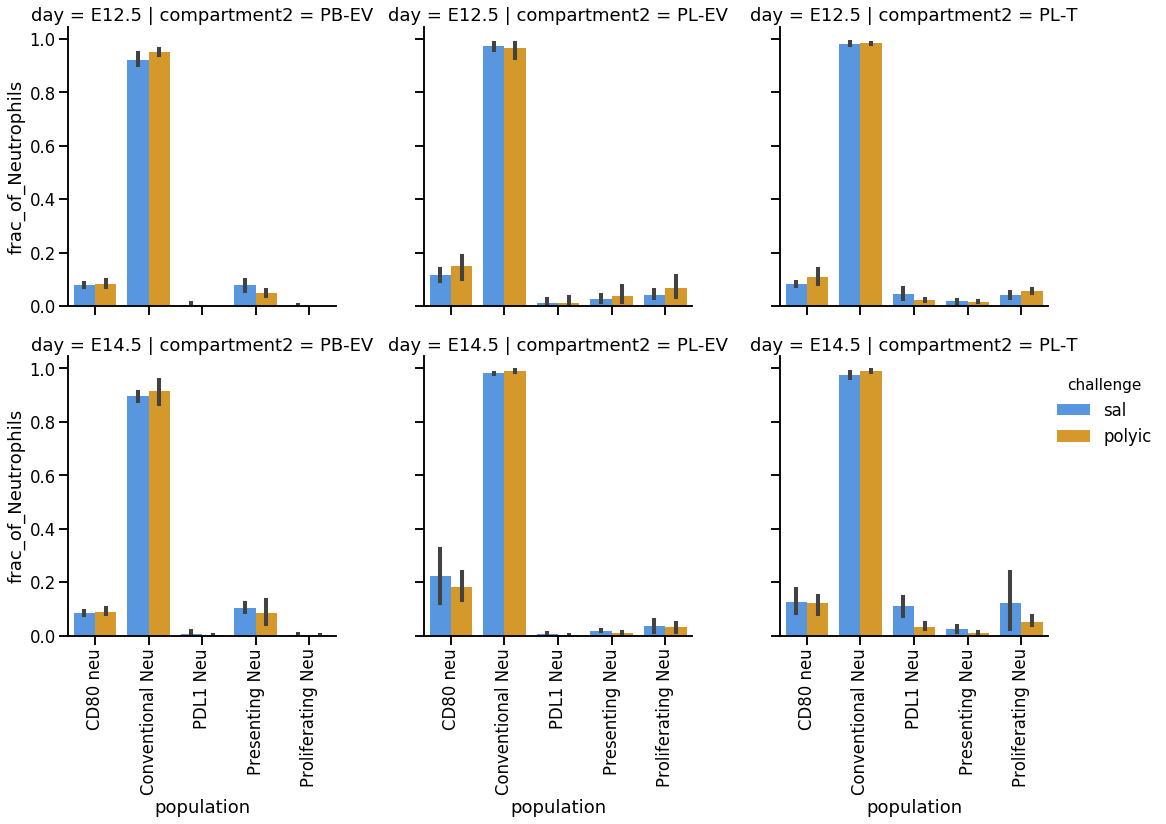

In [3]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = neu_sub_counts[neu_sub_counts['timePI'].isin(['2hr']) & neu_sub_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_Neutrophils',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], row_order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


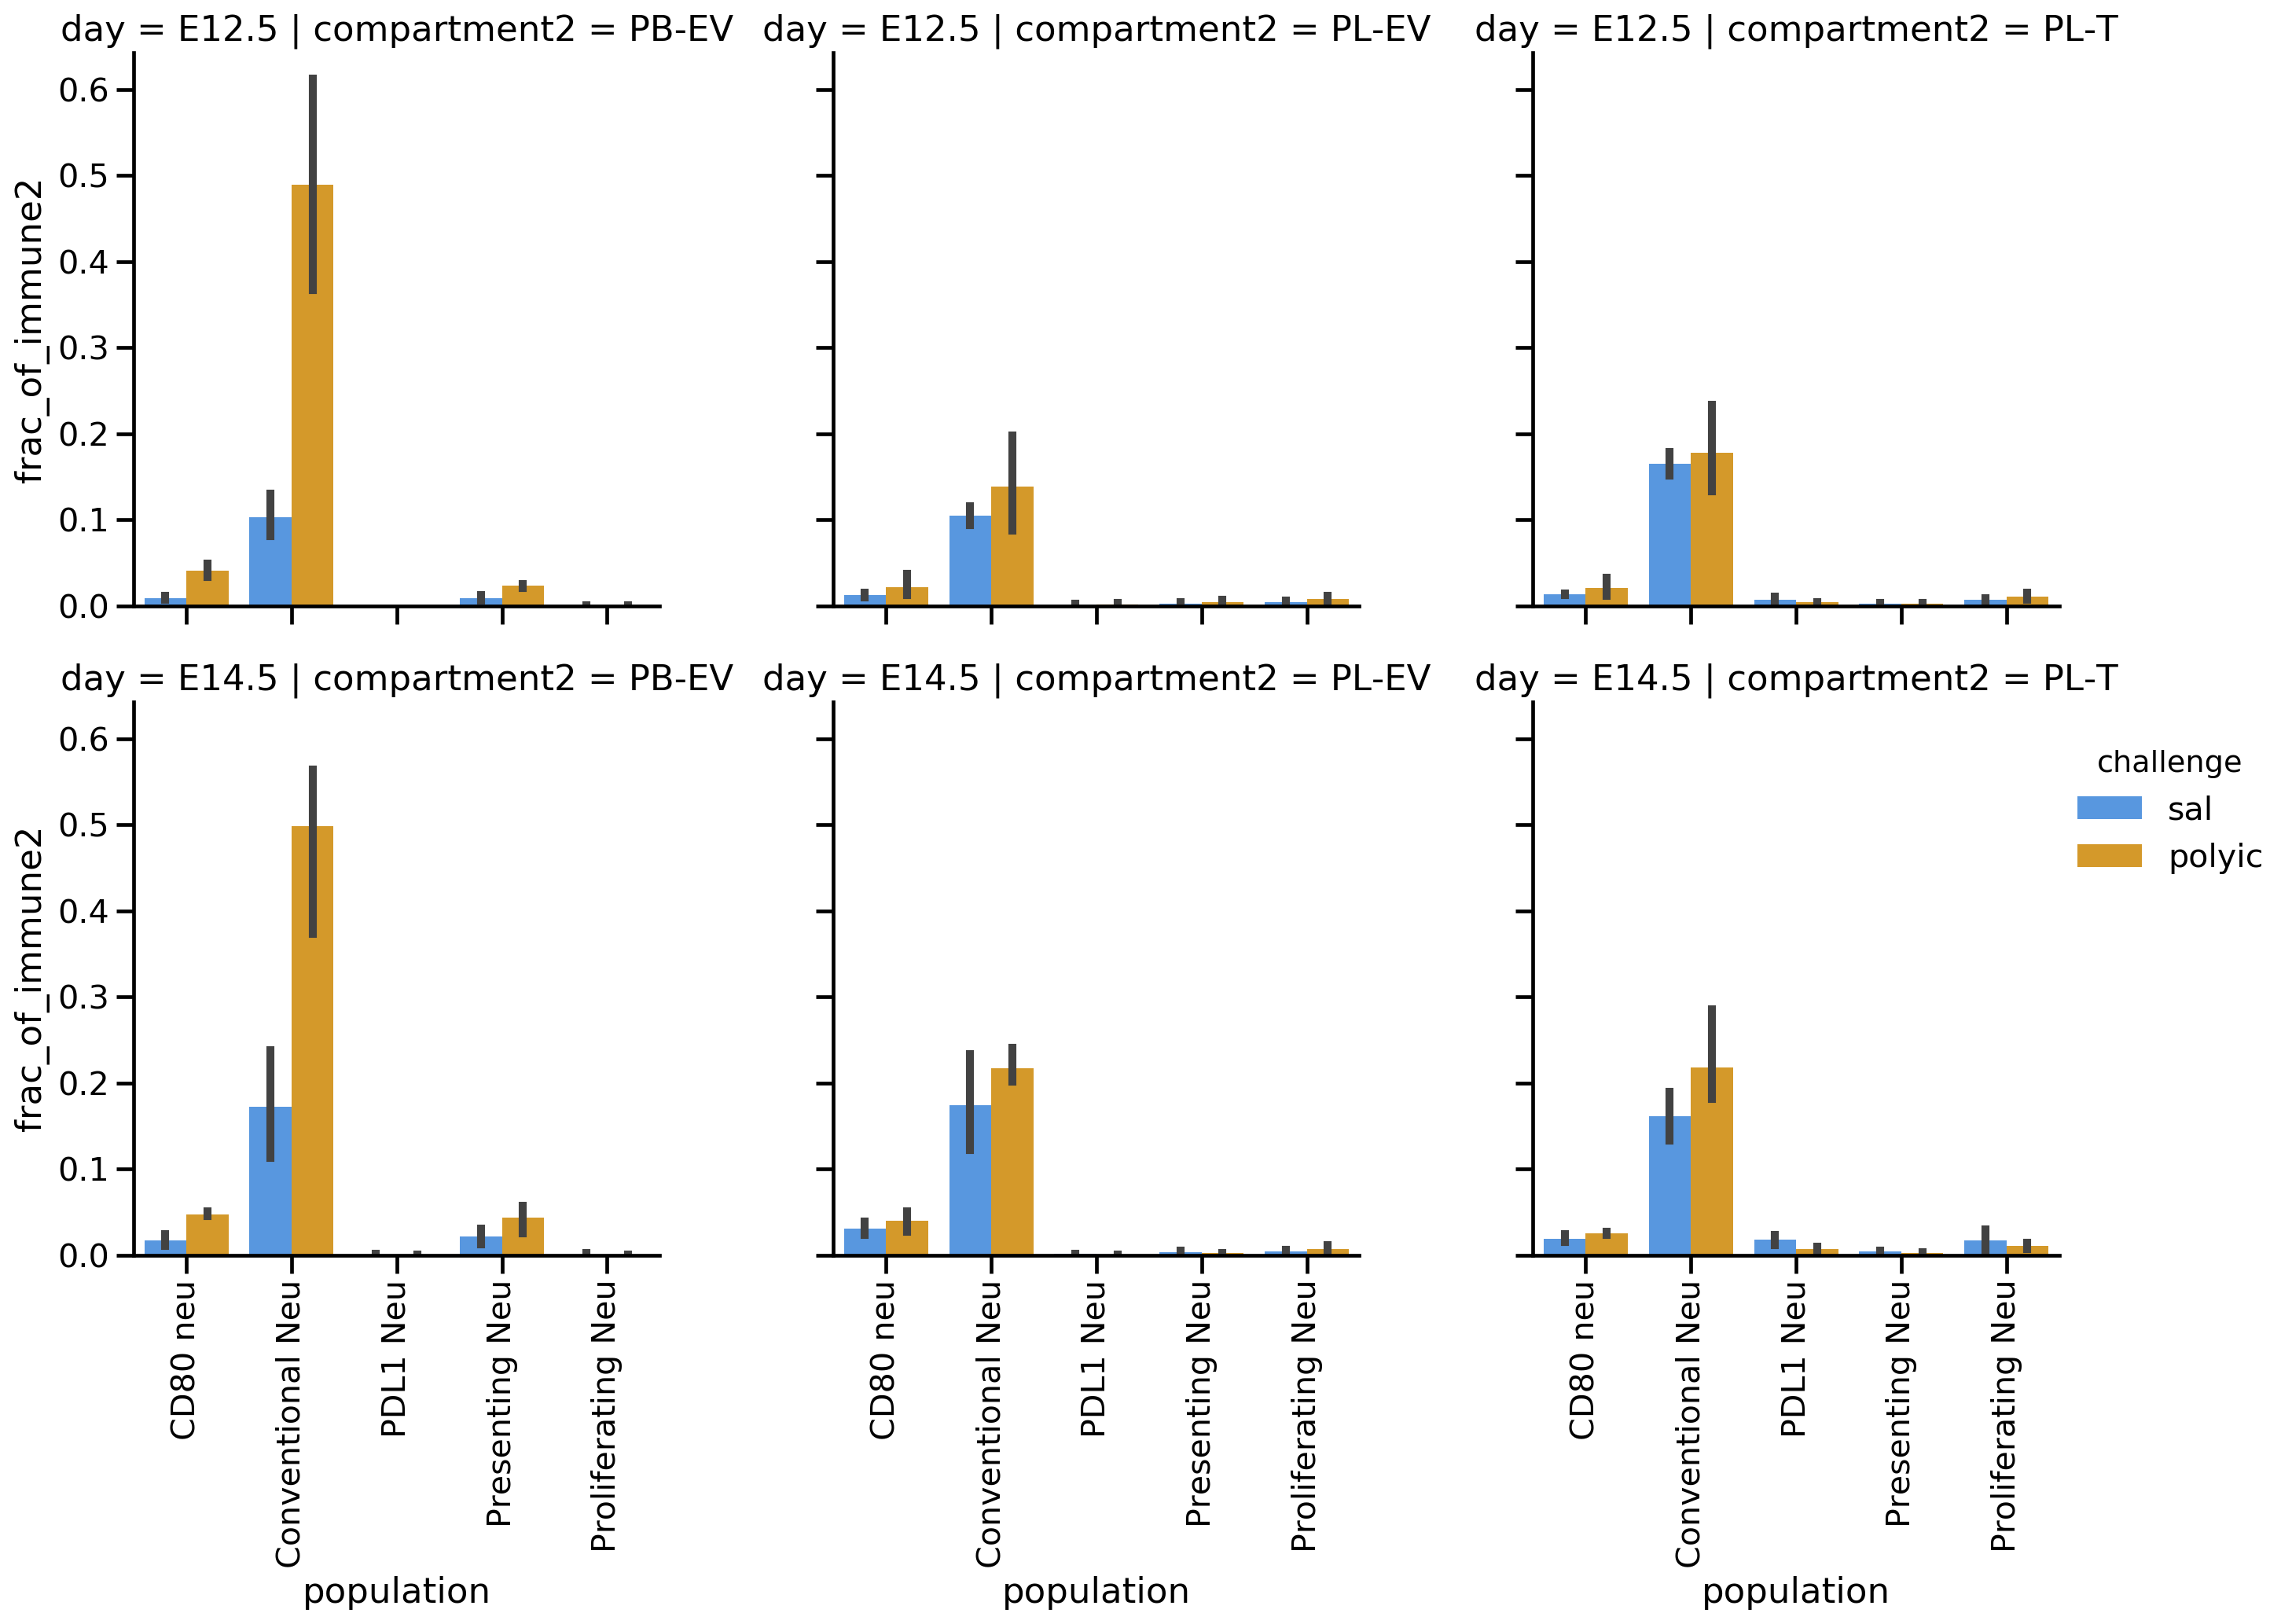

In [94]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = neu_sub_counts[neu_sub_counts['timePI'].isin(['2hr']) & neu_sub_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_immune2',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], row_order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


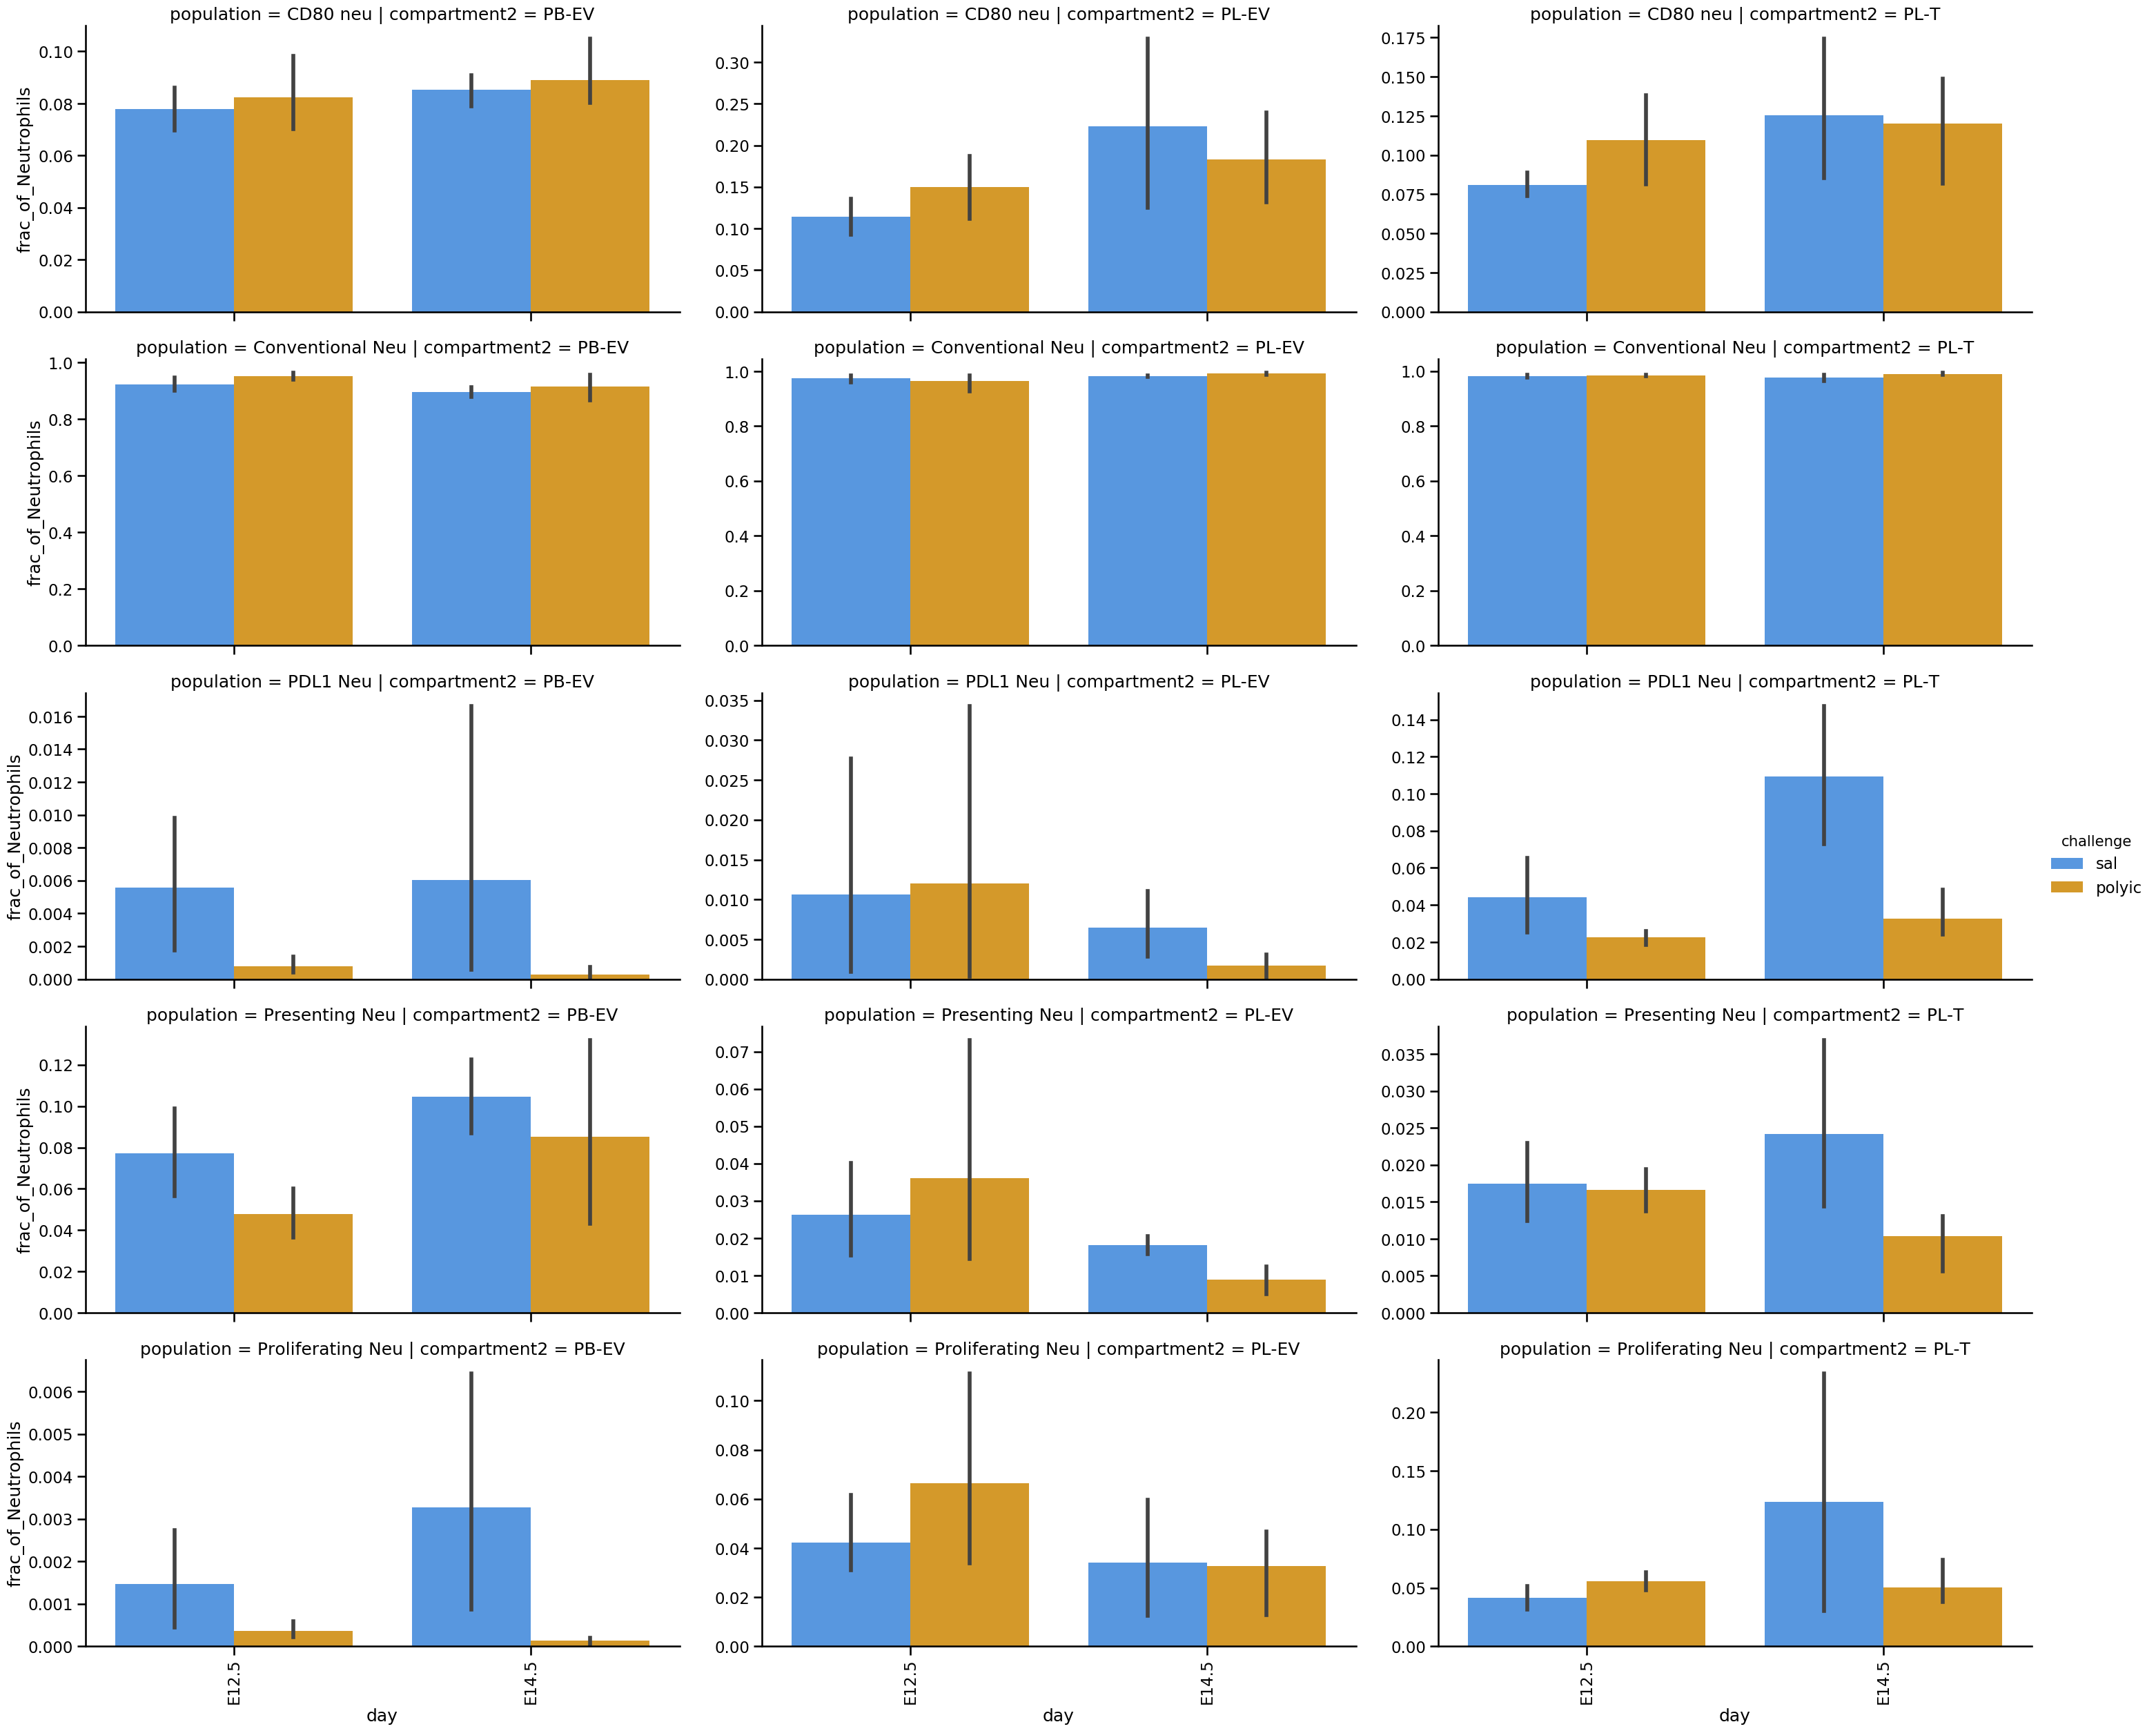

In [4]:
plt.rcParams['figure.dpi'] = 100
sns.set_context('talk', font_scale= 1.2)
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = neu_sub_counts[neu_sub_counts['timePI'].isin(['2hr']) & neu_sub_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'day', row ='population', y='frac_of_Neutrophils',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = False, 
                height=5, aspect=2)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


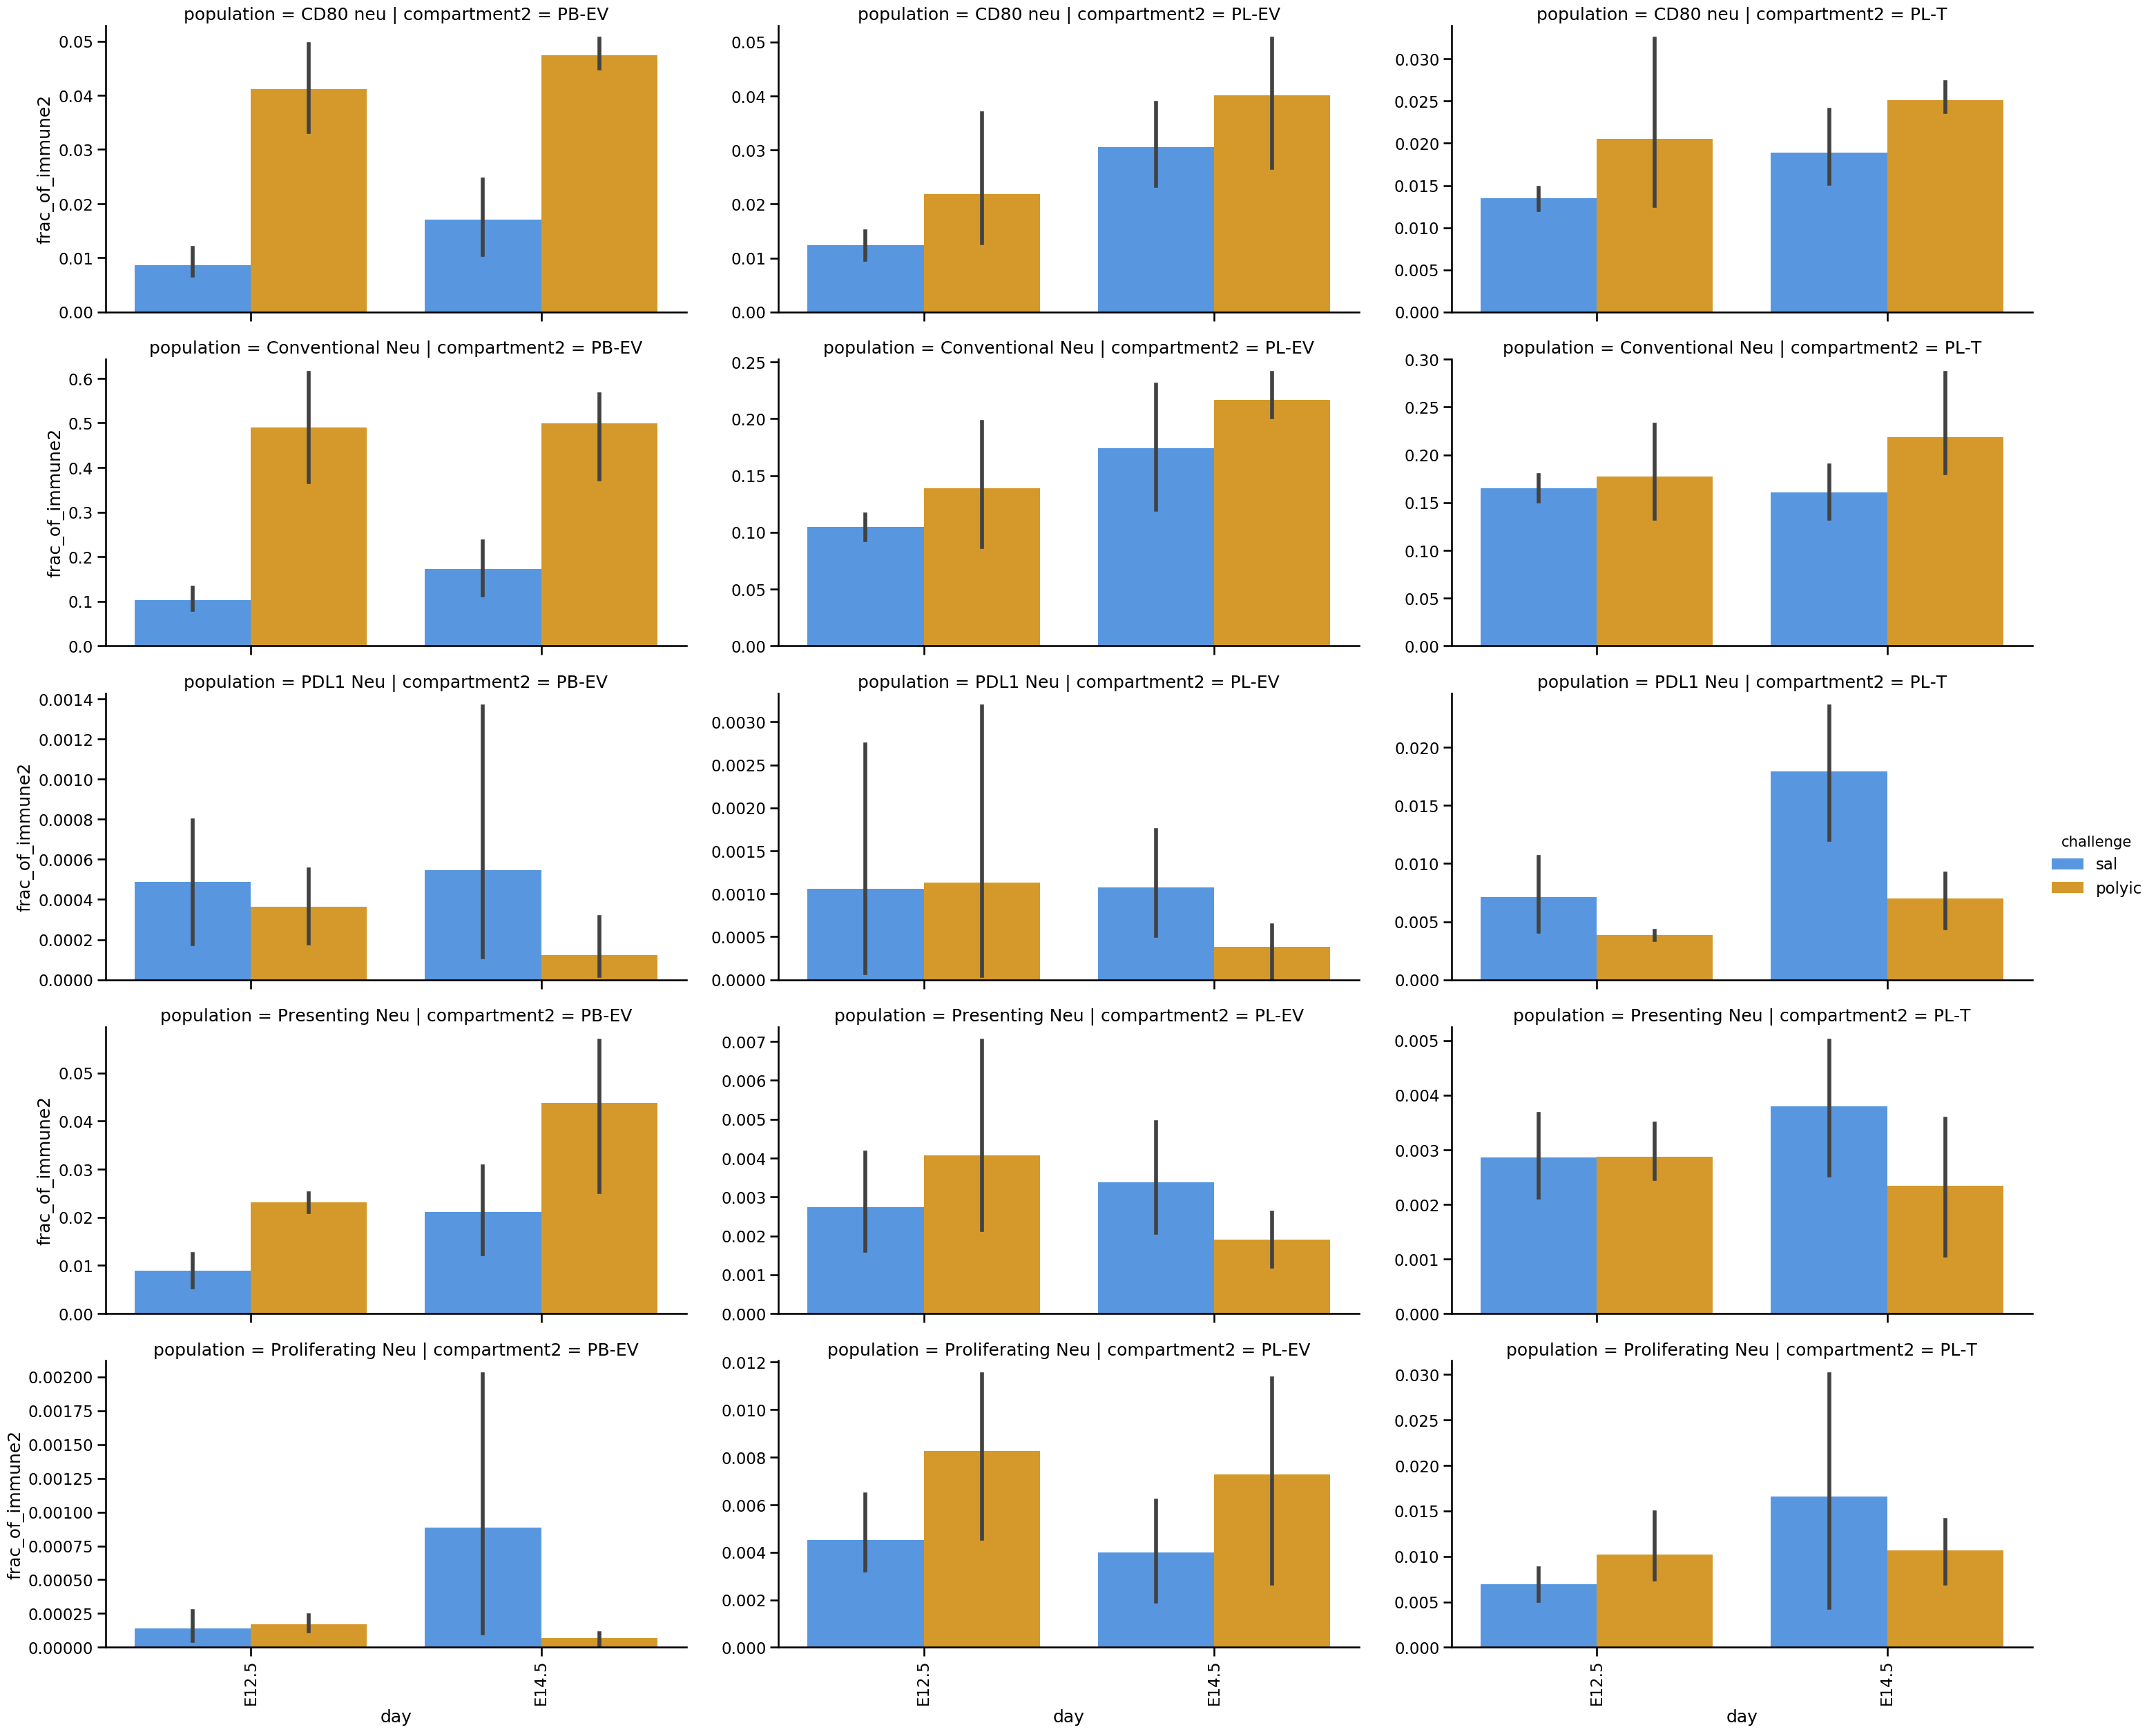

In [98]:
plt.rcParams['figure.dpi'] = 100
sns.set_context('talk', font_scale= 1.2)
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = neu_sub_counts[neu_sub_counts['timePI'].isin(['2hr']) & neu_sub_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'day', row ='population', y='frac_of_immune2',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = False, 
                height=5, aspect=2)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [111]:
mo_MHCII_PDL1['population'].unique()

array(['Mo_PDL1pos', 'Ly6Chi_MHCIIpos', 'Ly6Chi_PDL1pos',
       'Ly6Clo_MHCIIpos', 'Ly6Clo_PDL1pos', 'Ly6Cmid_MHCIIpos',
       'Ly6Cmid_PDL1pos', 'Mo_MHCIIpos'], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


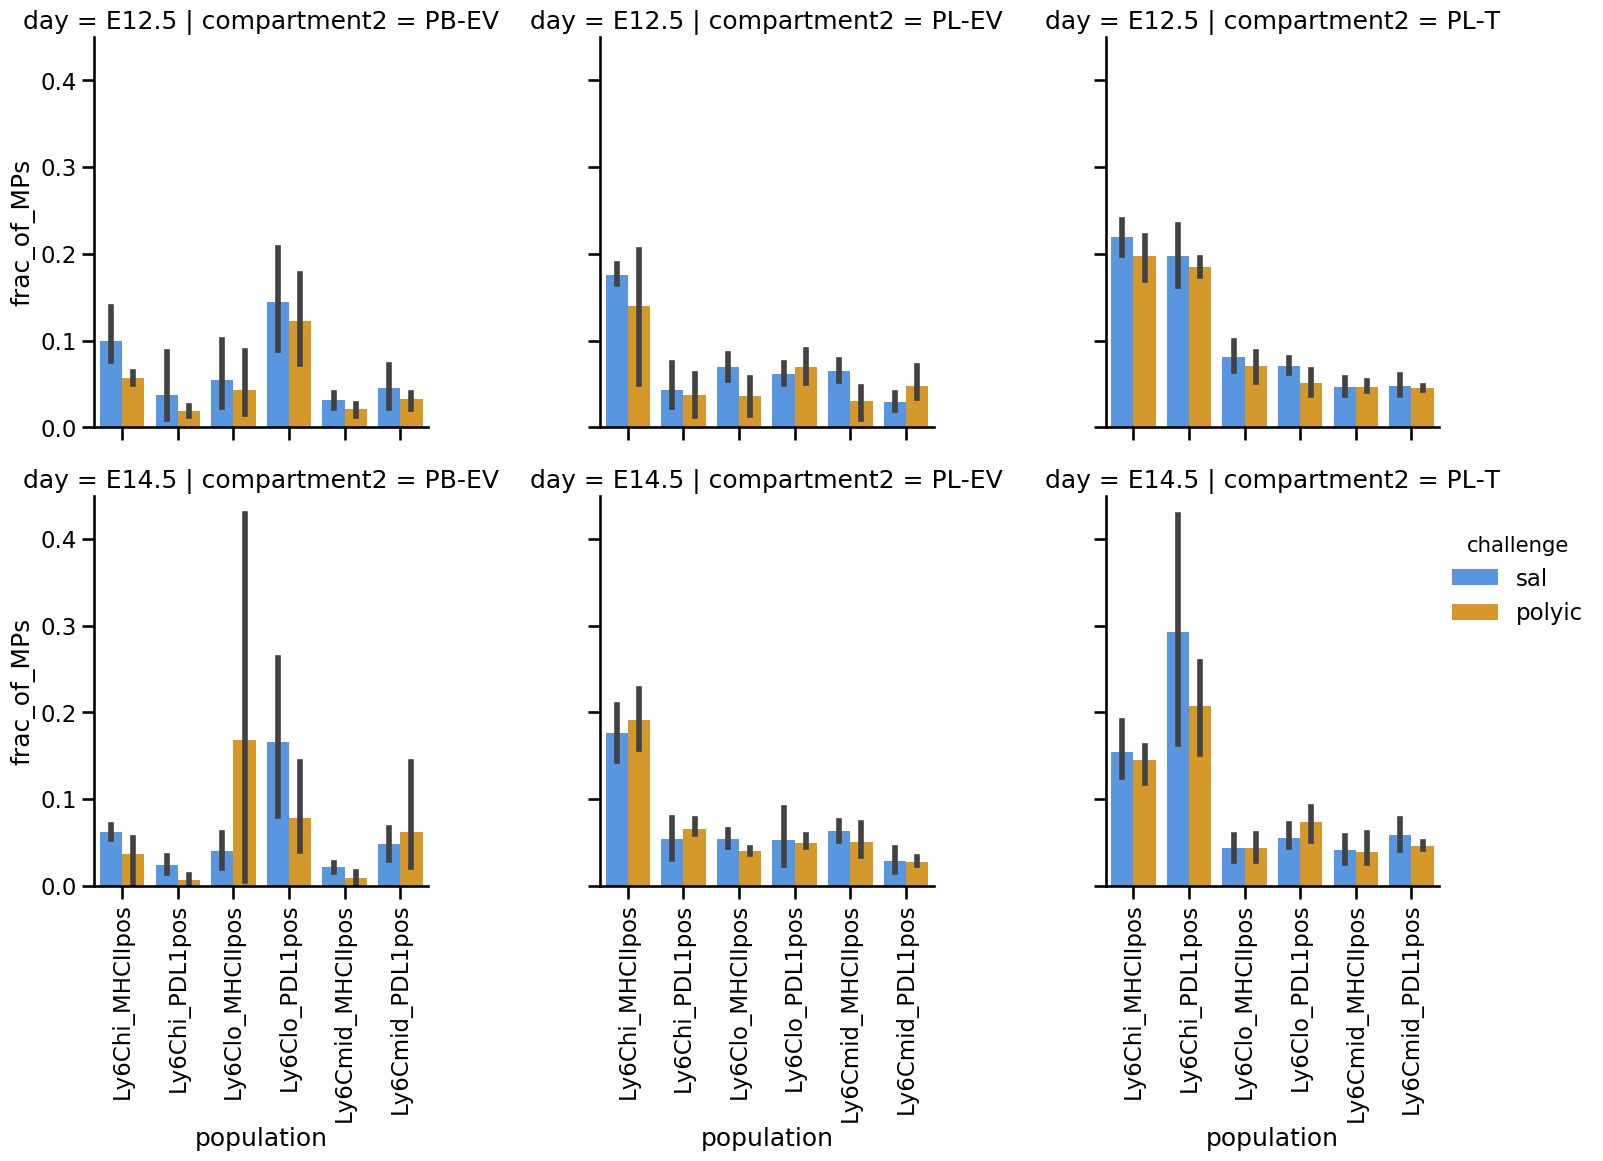

In [114]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = mo_MHCII_PDL1[mo_MHCII_PDL1['timePI'].isin(['2hr']) & mo_MHCII_PDL1['population'].isin(['Ly6Chi_MHCIIpos', 'Ly6Chi_PDL1pos',
       'Ly6Clo_MHCIIpos', 'Ly6Clo_PDL1pos', 'Ly6Cmid_MHCIIpos',
       'Ly6Cmid_PDL1pos'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_MPs',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], row_order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


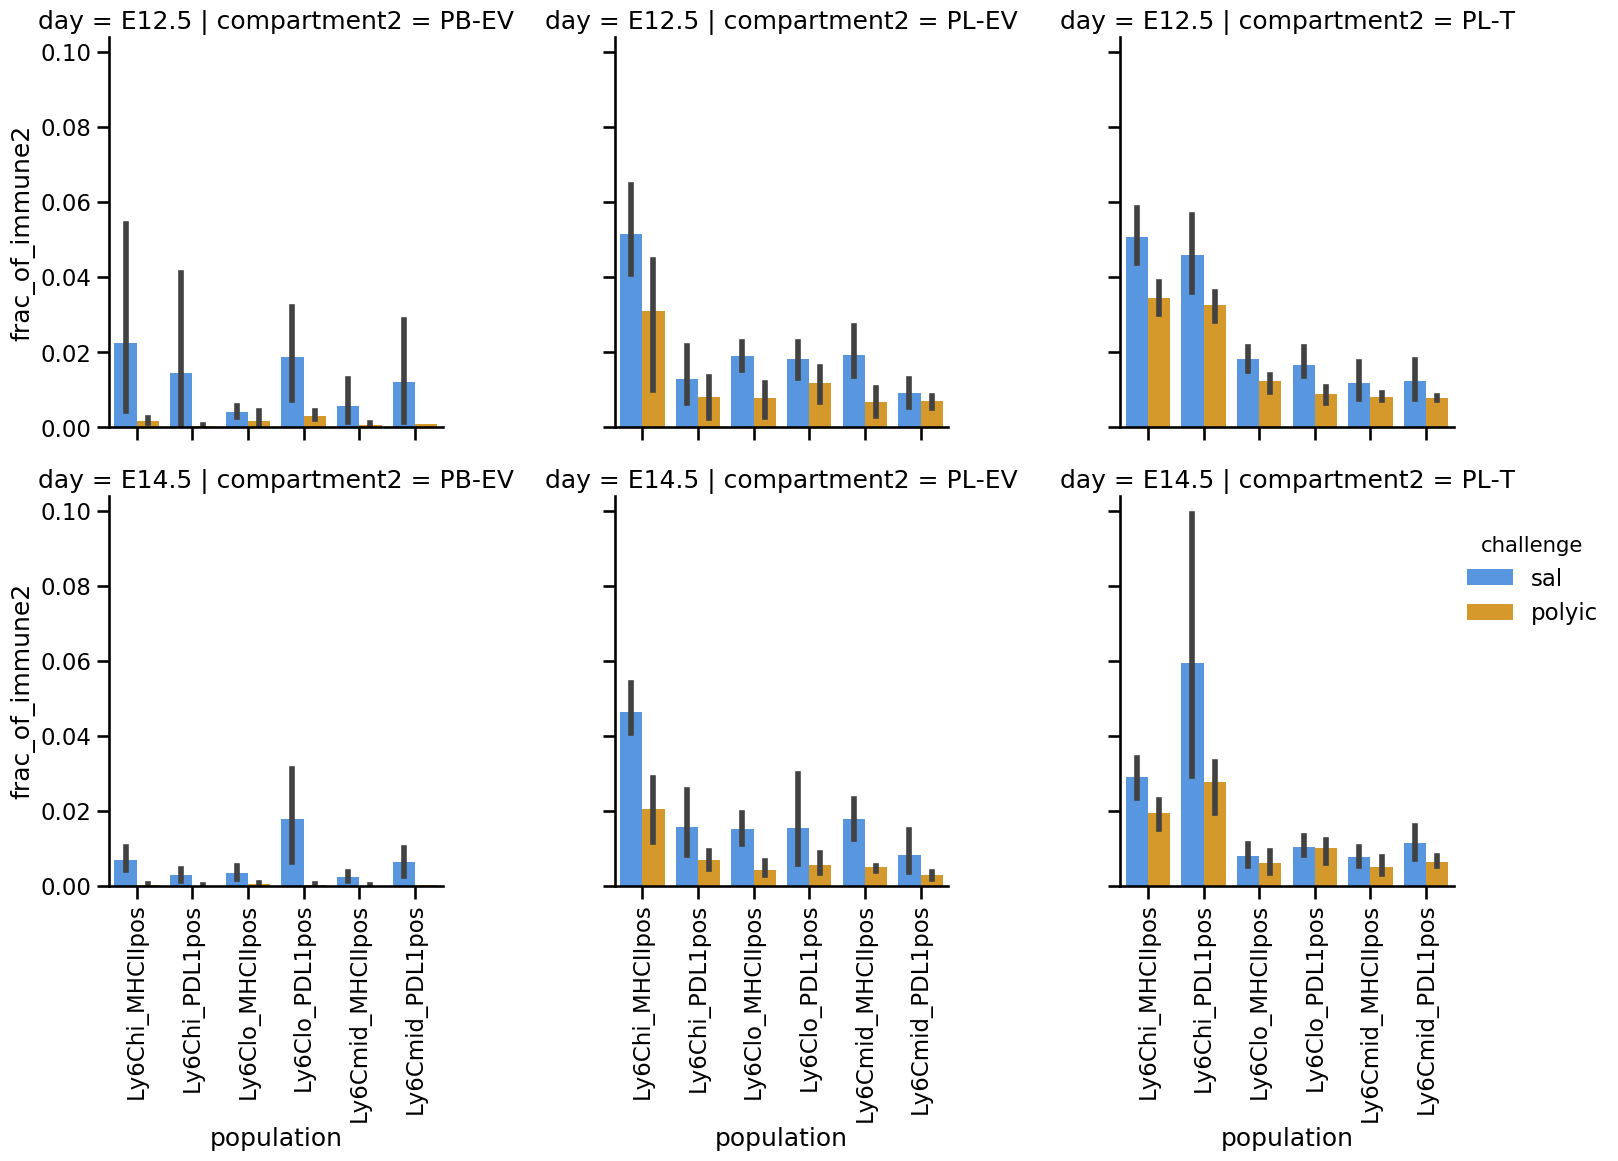

In [115]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = mo_MHCII_PDL1[mo_MHCII_PDL1['timePI'].isin(['2hr']) & mo_MHCII_PDL1['population'].isin(['Ly6Chi_MHCIIpos', 'Ly6Chi_PDL1pos',
       'Ly6Clo_MHCIIpos', 'Ly6Clo_PDL1pos', 'Ly6Cmid_MHCIIpos',
       'Ly6Cmid_PDL1pos'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_immune2',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], row_order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


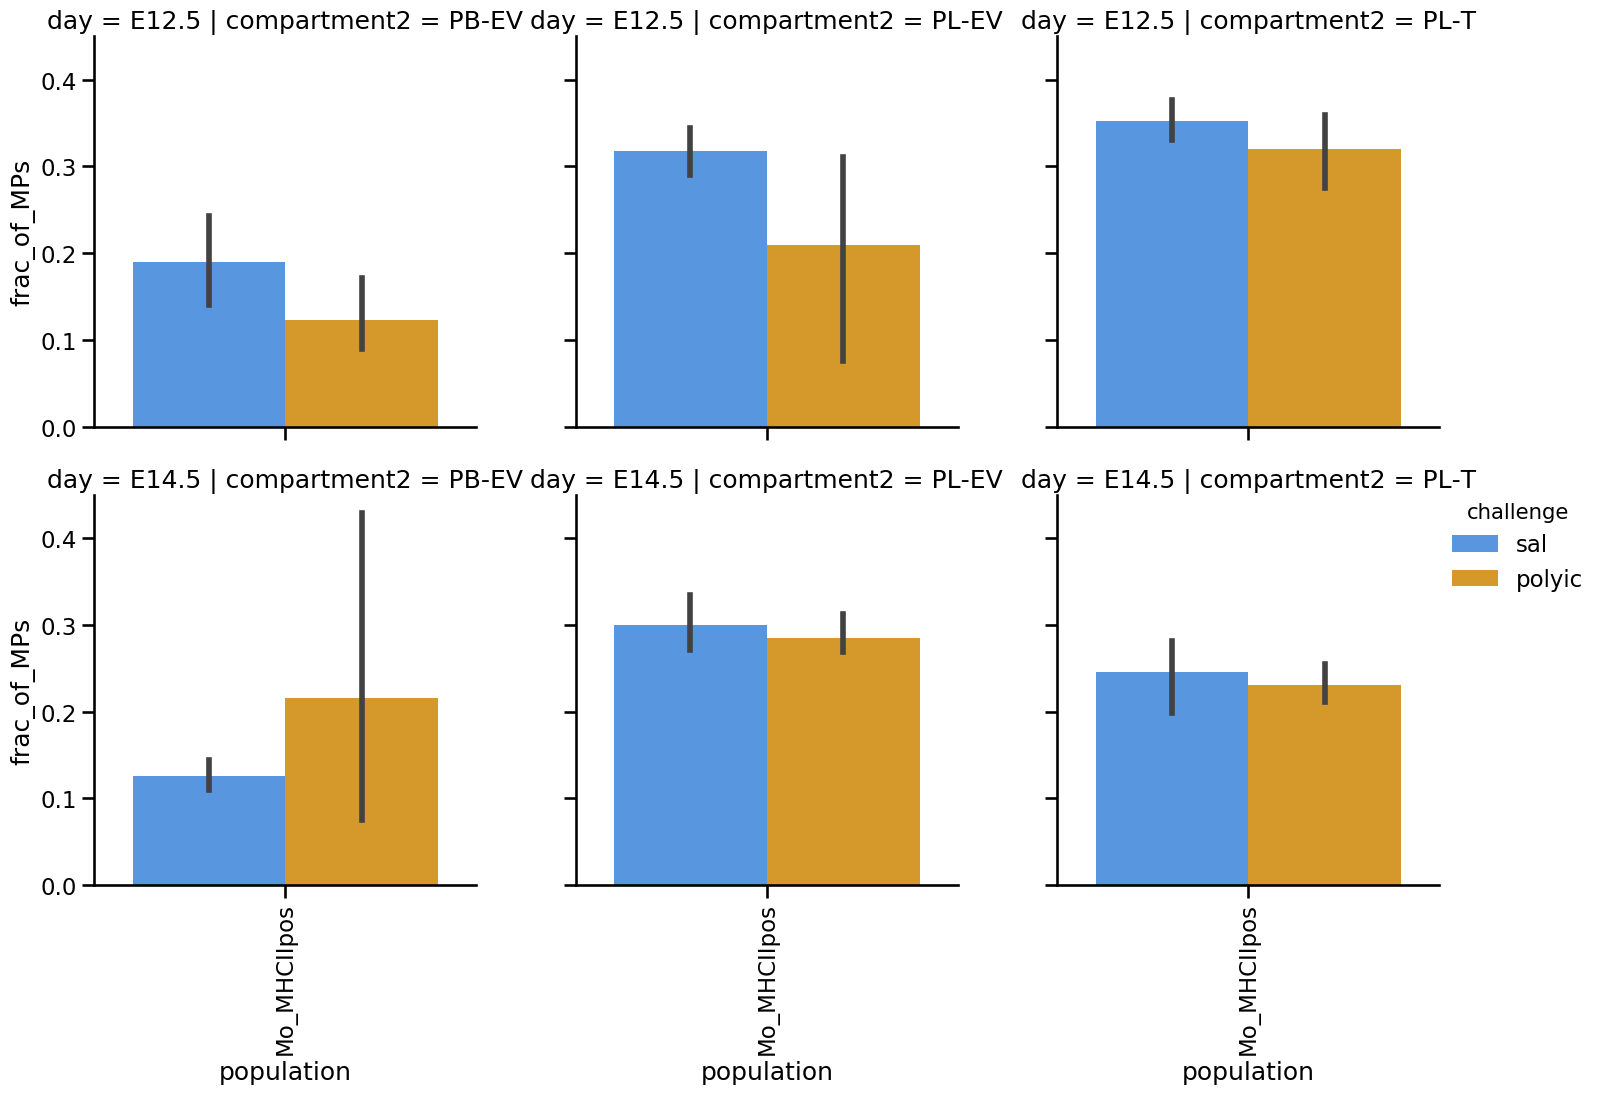

In [113]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = mo_MHCII_PDL1[mo_MHCII_PDL1['timePI'].isin(['2hr']) & mo_MHCII_PDL1['population'].isin(['Mo_MHCIIpos'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_MPs',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], row_order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


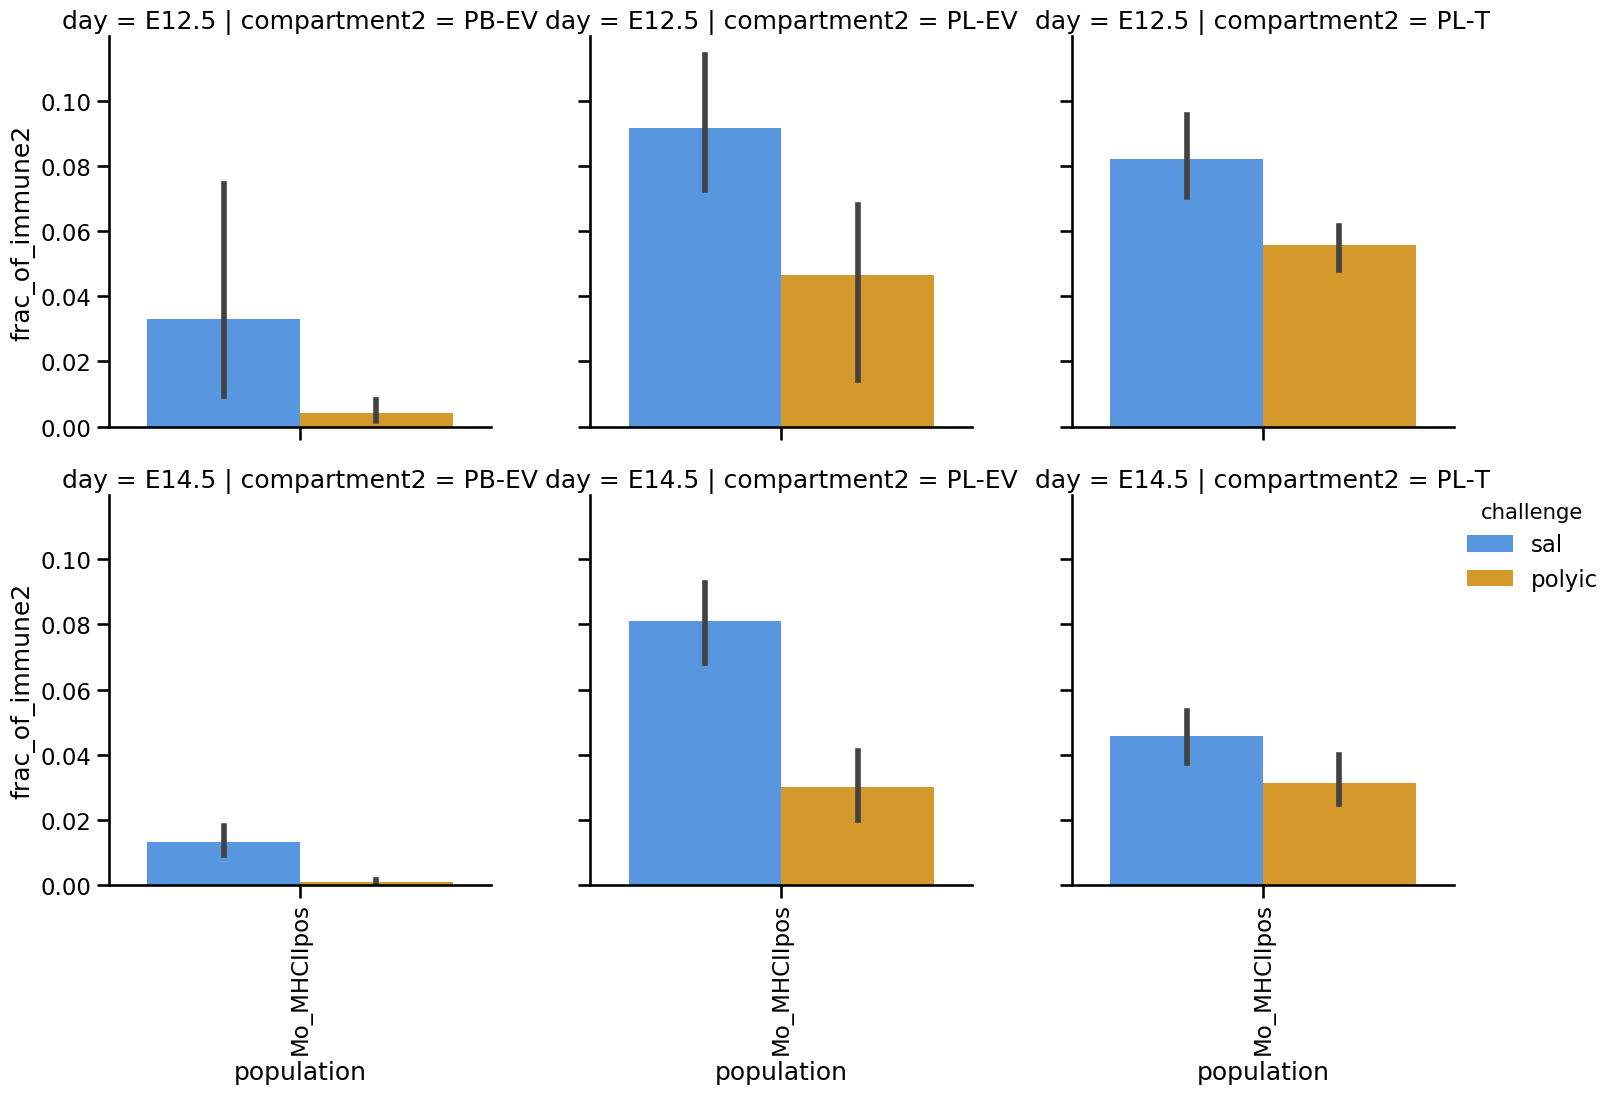

In [112]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = mo_MHCII_PDL1[mo_MHCII_PDL1['timePI'].isin(['2hr']) & mo_MHCII_PDL1['population'].isin(['Mo_MHCIIpos'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_immune2',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], row_order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];